<div style="background-color: blue; color: white;">
    <h1 font-size: 70px;">Lead Scoring Case Study</h1>
  
</div>


## <font color="green">Step 1: Importing Libraries and Data</font>

 ### <font color="black">1.1: Importing Libraries, Suppressing Warnings, and Setting Display</font>

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x) 

 ### <font color="black">1.2 Data Reading</font>

In [3]:
df_leads = pd.read_csv('Leads.csv')

In [4]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df_leads.shape

(9240, 37)

 ##### <font color="brown">IMPORTANT NOTE: The original dataframe has 9240 rows and 37 columns</font>

## <font color="green">Step 2: Exploring and Inspecting the Data</font>

### <font color="black">2.1: Obtaining a summary of all numerical columns to understand the dataset's distribution</font>
### <font color="black"> & Identifying any potential anomalies</font>

In [6]:
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

 ### <font color="black">2.2: Determining the count of unique values in each column of the dataset.</font>

In [7]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

 ### <font color="black">2.3: Inspecting column data types and identify any null values within the dataset</font>

In [8]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 ##### <font color="brown">IMPORTANT NOTE: The dataframe includes null values.</font>

In [9]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

 ##### <font color="brown">IMPORTANT NOTE: Within the dataframe, several columns exhibit a notable quantity of missing or null values. Our subsequent actions regarding data cleansing or imputation will necessitate decisions regarding these columns.</font>

 ### <font color="black">2.5: Checking for duplicate rows</font>

In [10]:
# Check for duplicate rows
print(df_leads.duplicated().sum())

0


 ##### <font color="brown">IMPORTANT NOTE: The dataframe does not contain any duplicate entries.</font>

## <font color="green">Step 3: Data Cleaning</font>

 ### <font color="black">3.1 Handling 'Select' Values</font>

As mentioned in the Problem Statement, many categorical variables have a value labeled 'Select'. This needs to be handled because it's similar to having a null value. One possible reason for this could be that customers didn't choose any option from the list, resulting in the default 'Select' value for those columns.

In [11]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


 ##### <font color="brown">IMPORTANT NOTE: At this point, the dataframe "df_leads" no longer contains any 'Select' values.</font>

### 3.2 Handling Missing Values

In [14]:
# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### 3.2.1 Drop Columns with more than 40% Null Values

In [15]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [16]:
# dropping columns using UDF
dropNullColumns(df_leads) 

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [17]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 3.2.2 Columns with Categorical Data

In [18]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


 ##### <font color="brown">IMPORTANT NOTE</font>
- The approach involves counting values in each categorical column.
- Determine the treatment of missing values based on the count in that specific column.

In [19]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

### Key Observations
**City:** The "City" column has a lot of missing values, about 39.71%. Trying to fill in these missing values with "Mumbai" could make the data biased and might affect the model. It's better to think about removing this column.

**Specialization:** About 36.58% of the "Specialization" column is missing. The choices of specializations are spread out evenly. Instead of filling in or removing, it's a good idea to create a new category called 'Others'.

**Tags:** Around 36.29% of the "Tags" column is missing. Imputing with missing values with new category called 'Unknown'

**What matters most to you in choosing a course:** This attribute is missing in 29.32% of cases. Almost 99.95% of customers selected 'better career prospects'. This strong preference might not provide much useful information.

**What is your current occupation:** It makes sense to fill the missing values with 'Unemployed' because it's the most common situation. This detail is important for the business, as X Education offers online courses that unemployed people might take to improve their chances of getting a job.

**Country:** Since about 96% of customers are from India, because X Education focuses on online courses, it's not a good idea to fill the missing values with "India". So, it's better to drop the "Country" column.

**Last Activity:** Since "Email Opened" is the most common action and only 1.11% of data is missing, filling the missing values with 'Email Opened' is reasonable.

**Lead Source:** Since "Google" is the most common source and only 0.39% of data is missing, filling the missing values with 'Google' is a good choice.

 #### <font color="brown">Dropping the following columns:</font>

- 🔵'City'
- 🔵'Country'
- 🔵'What matters most to you in choosing a course'

In [20]:
# Dropping Columns
print("Shape before dropping:", df_leads.shape)
columns_to_drop = ['City', 'Country', 'What matters most to you in choosing a course']
df_leads.drop(columns_to_drop, axis=1, inplace=True)
print("Shape after dropping:", df_leads.shape)

Shape before dropping: (9240, 30)
Shape after dropping: (9240, 27)


 #### <font color="brown">Filling in the Missing Values for the Following Columns</font>
- 🔵'Specialization',
- 🔵'Lead Source',
- 🔵'Last Activity', 
- 🔵'What is your current occupation'

In [21]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','Tags':'Unknown'}
df_leads=df_leads.fillna(value=missing_values)

In [22]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Search                                      0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on 

### 3.2.3 Columns with Numerical Data

In [23]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

 ##### <font color="brown">IMPORTANT NOTE: Missing values in 'TotalVisits' can be imputed with `mode`.</font>

In [24]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [25]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [26]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

<strong><span style="color:black">Re-checking the null values for columns </span></strong>

In [27]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

### 3.3 Removing Unwanted Columns

In [28]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

#### 3.3.1 Handling columns with only one unique value 

In [29]:
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

           Tags Update me on Supply Chain Content Get updates on DM Content  \
count      9240                              9240                      9240   
unique       27                                 1                         1   
top     Unknown                                No                        No   
freq       3353                              9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

### KEY OBSERVATIONS
The subsequent columns exhibit only a single unique value:

- 'I agree to pay the amount through cheque'
- 'Get updates on DM Content'
- 'Update me on Supply Chain Content'
- 'Receive More Updates About Our Courses'
- 'Magazine'

These columns lack variation in responses from customers and are not contributory; hence, they can be eliminated.


In [30]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)


Before Dropping Columns (9240, 27)
After Dropping Columns (9240, 22)


#### 3.3.2 Dropping columns of no use for modeling

 ### <font color="black">KEY OBSERVATIONS</font>
The following columns serve no significant purpose for the model:
- 'Prospect ID'
- 'Lead Number'
- 'Last Notable Activity'
Removing these columns will eliminate redundant data from the dataframe.

In [31]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 22)
After Dropping Columns (9240, 19)


In [32]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

<strong><span style="color:brown">IMPORTANT NOTE:</span></strong> No missing values in rows

### 3.4 Checking & Dropping Category Columns that are Skewed
- <strong><span style="color:bROWN">IMPORTANT NOTE:</span></strong> This is similar to the handling of unique values in numeric columns

#### 3.4.1 Checking skewness in categorical columns

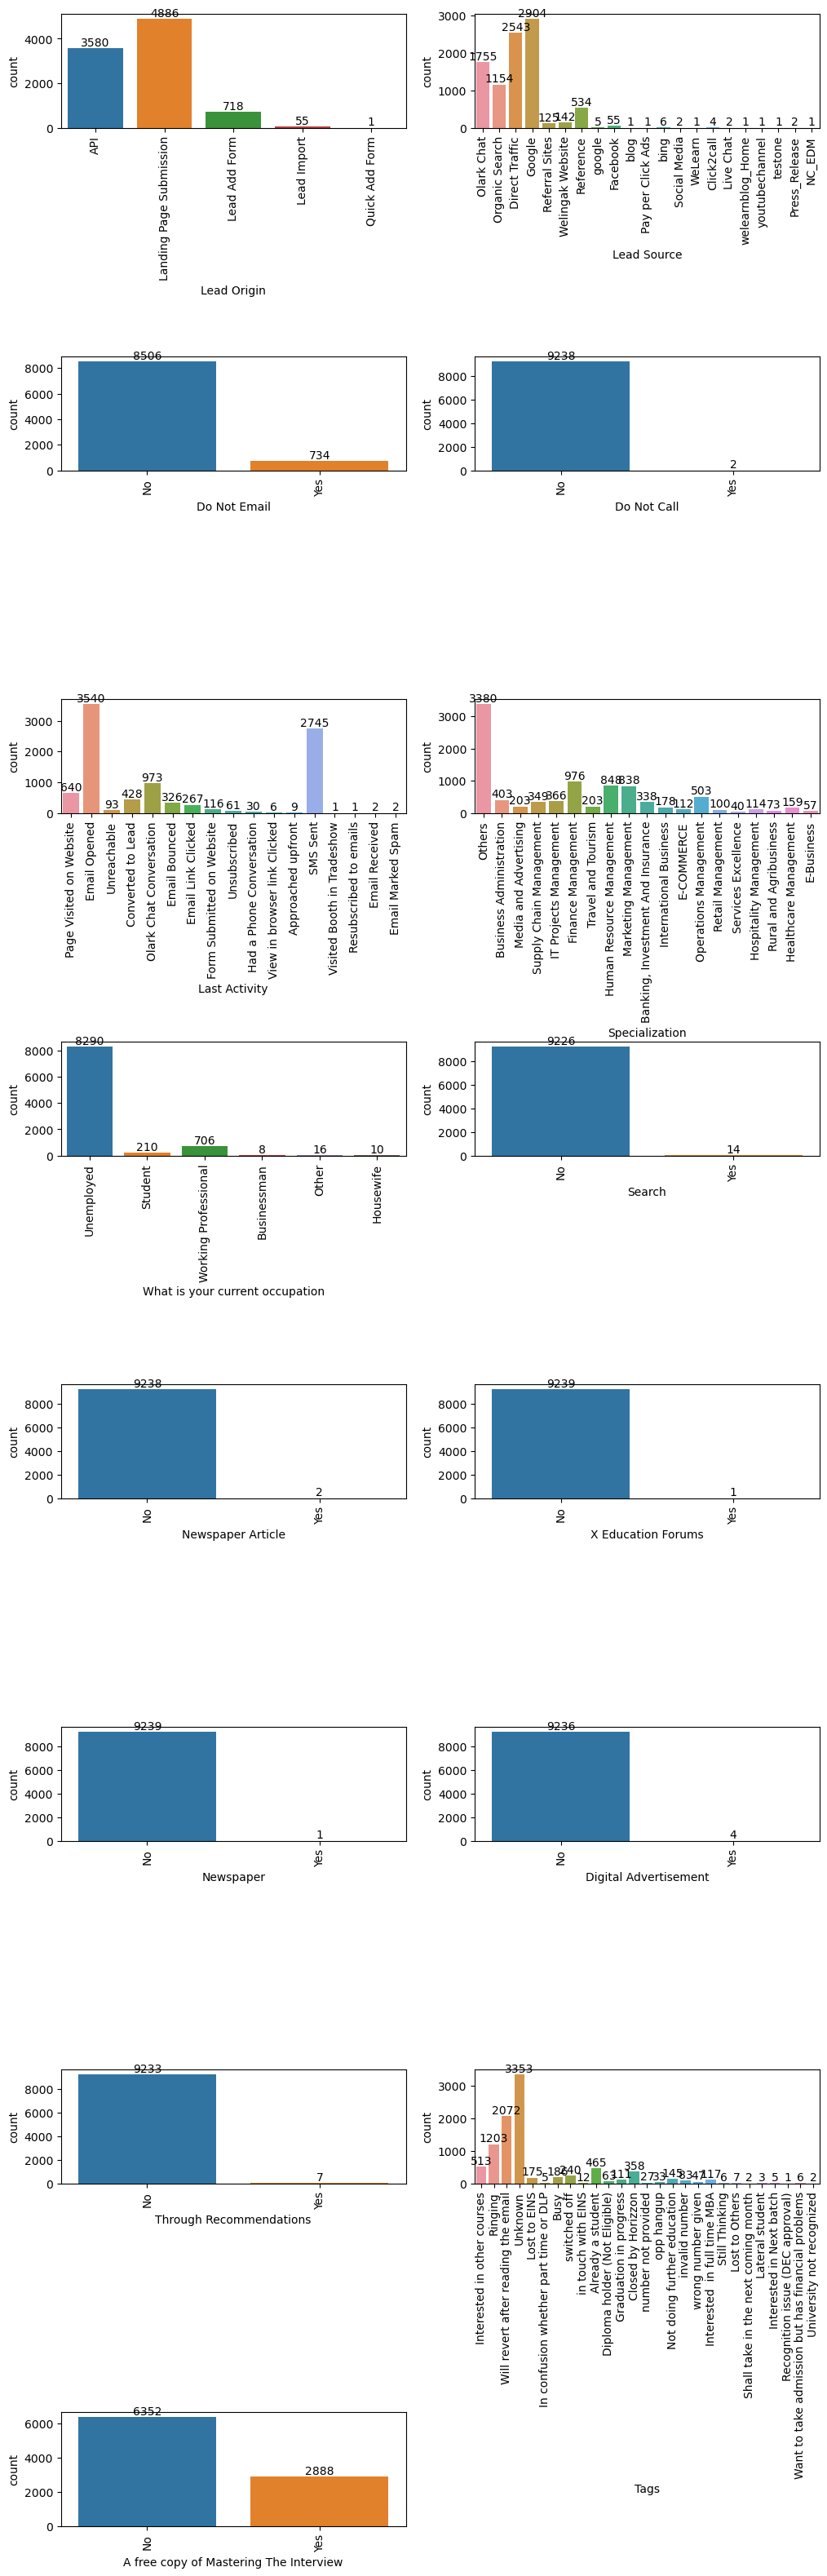

In [33]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

##### <font color="brown">IMPORTANT NOTE: Skewed Data Columns Exclusion:</font>
The data within the following columns is significantly skewed:

- 'Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'

Due to their skewed distribution, these columns will be excluded from the analysis. It's important to note that skewed variables can adversely impact the accuracy of logistic regression models by potentially introducing biased or inaccurate parameter estimates.

In [34]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 19)
After Drop:  (9240, 12)


In [35]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

##### <font color="brown">IMPORATANT NOTE: The data is now free from missing value.</font>

### 3.5 Outlier Analysis

#### For Numerical Columns

In [36]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

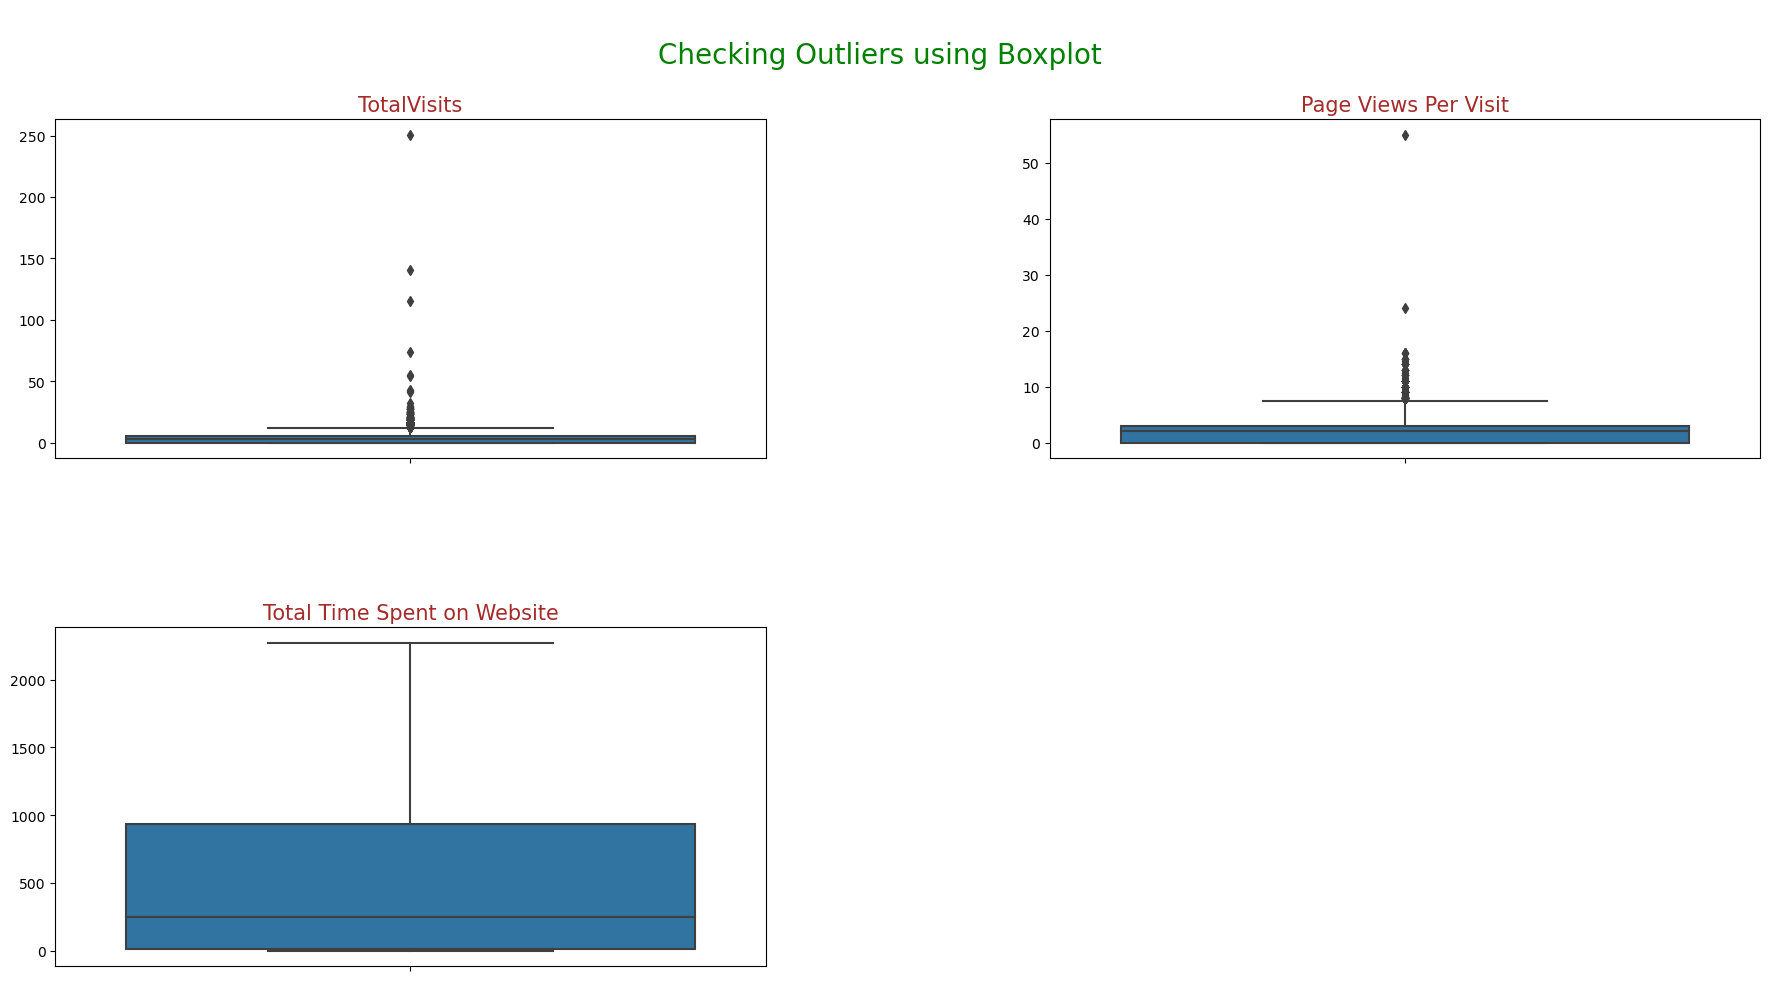

In [37]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df_leads,num_cols)

In both "TotalVisits" and "Page Views Per Visit," there are outliers that are noticeable from the boxplot representation. Therefore, it's necessary to handle these outliers for these specific variables.

#### Capping Outliers for the treatment

In [38]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [39]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [40]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df_leads,capping_cols)

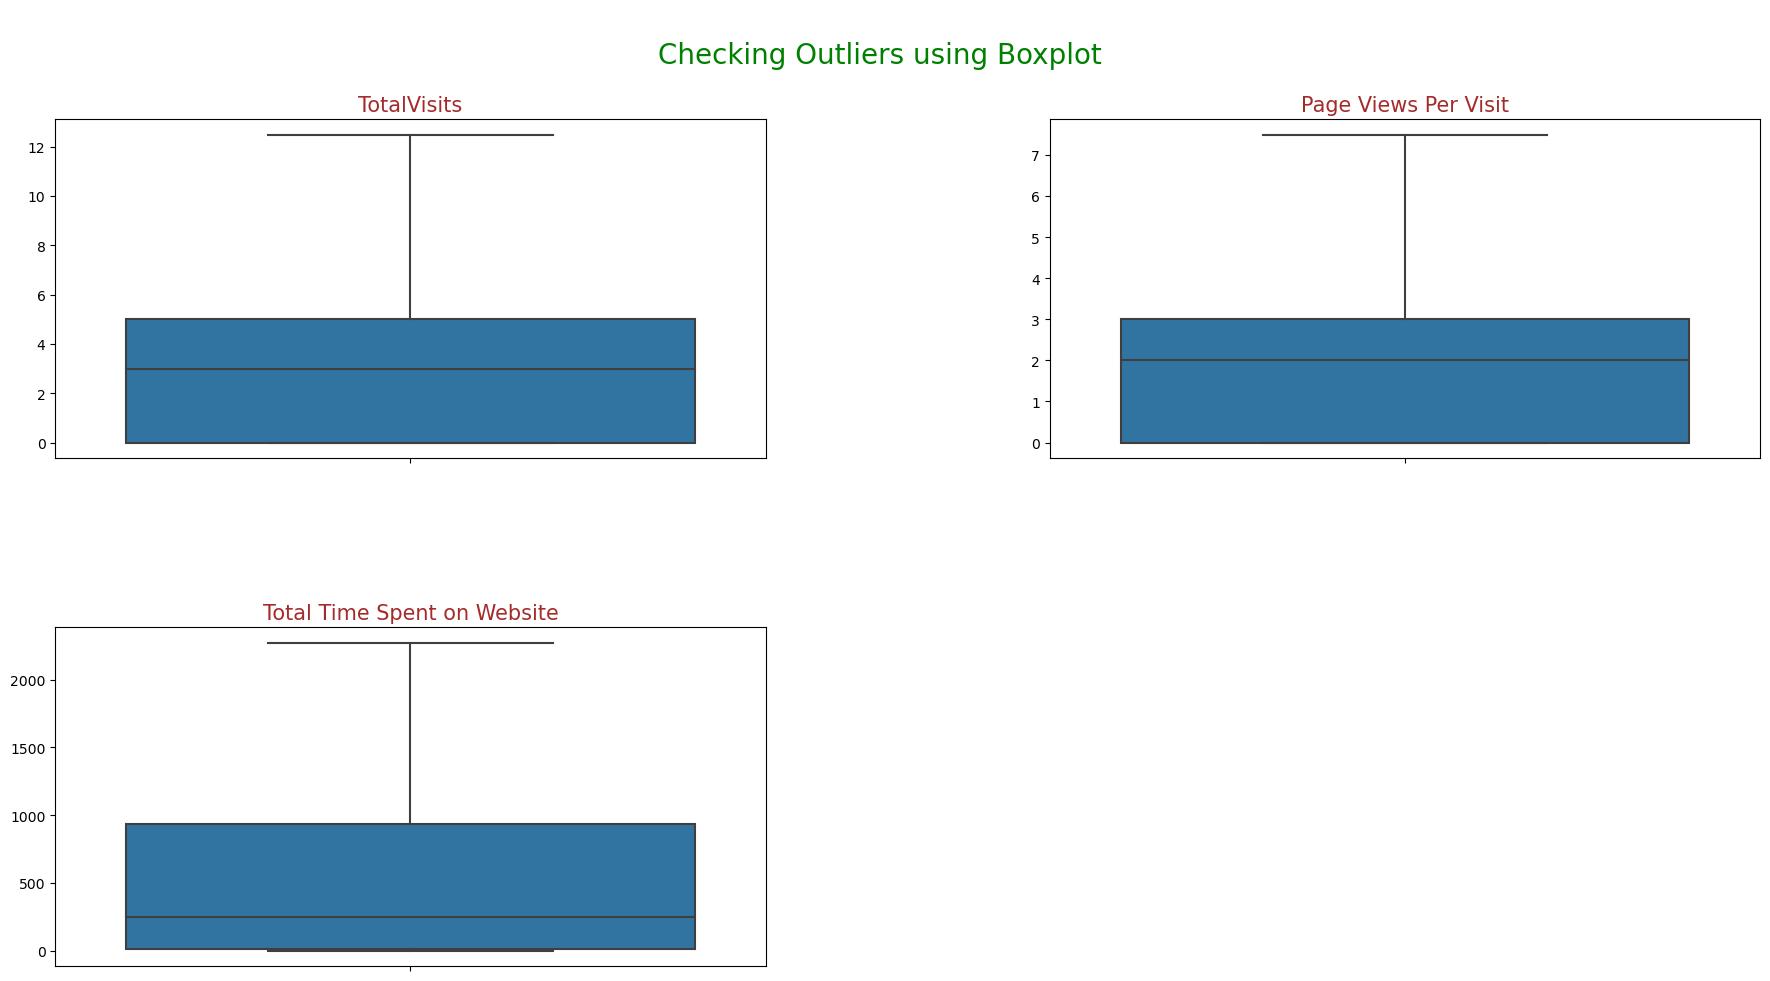

In [41]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [42]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

### 3.6 Fixing Invalid values & Standardising Data in columns

- Verifying the data entries for accurate formatting and casing styles (uppercase, lowercase).
- Reviewing the data types assigned to each column to ensure consistency and correctness.

In [43]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

In [44]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview","Tags"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("---"*40,"\n")


value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

------------------------------------------------------------------------------------------------------------------------ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

### Summary of Categorical Data Analysis:

The above output illustrates the distribution of various categorical variables within the dataset. Here are the key insights:

#### Lead Origin:

- Most common: Landing Page Submission (52.88%)
- Others include: API (38.74%), Lead Add Form (7.77%), Lead Import (0.60%), Quick Add Form (0.01%)

#### Lead Source:

- Leading sources: Google (31.43%), Direct Traffic (27.52%), Olark Chat (18.99%)
- Others encompass various sources with lower percentages

#### Do Not Email:

- Majority opt for No (92.06%), while a smaller proportion choose Yes (7.94%)

#### Last Activity:

- Prominent activities: Email Opened (38.31%), SMS Sent (29.71%), Olark Chat Conversation (10.53%)

#### Specialization:

- Largest group: Others (36.58%)
- Top specializations include Finance Management, HR Management, Marketing Management, and more

#### Current Occupation:

- Unemployed is prevalent (89.72%), followed by Working Professionals (7.64%), Students (2.27%)

#### A Free Copy of Mastering The Interview:

- 68.74% opt for No, while 31.26% choose Yes

#### Tags:

- "Unknown" tag is the most common (36.29%)
- Notable tags include "Will revert after reading the email," "Ringing," "Interested in other courses," etc.

These insights provide valuable context for understanding the categorical distribution within the dataset.

#### 3.6.1 Grouping Low frequency values

In [45]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["Referral Sites",
                                                           "Facebook""bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [46]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Others               1.536797
Welingak Website     1.536797
Facebook             0.595238
bing                 0.064935
Name: Lead Source, dtype: float64

In [47]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [48]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Others                      3.474026
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

In [49]:
df_leads['Tags'].replace(['Interested in other courses','Already a student','Closed by Horizzon','switched off',
                       'Busy','Lost to EINS','Not doing further education','Interested  in full time MBA',
                       'Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given',
                       'opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking',
                       'Want to take admission but has financial problems','In confusion whether part time or DLP',
                       'Interested in Next batch','Lateral student','Shall take in the next coming month',
                       'University not recognized','Recognition issue (DEC approval)'],'Other_Tags',inplace=True)

In [50]:
# value_counts percentage after replace
df_leads["Tags"].value_counts(normalize=True)*100

Unknown                                36.287879
Other_Tags                             28.268398
Will revert after reading the email    22.424242
Ringing                                13.019481
Name: Tags, dtype: float64

In [51]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


##### <font color="brown">IMPORTANT NOTE</font>

For the "Do Not Email" and "Free Copy" binary categorical columns, we will perform a mapping to transform "Yes" to 1 and "No" to 0.

#### 3.6.2 Mapping Binary categorical variables

In [52]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

#### 3.6.3 Checking Data-types of variables

In [53]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Tags                         9240 non-null   object 
 11  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 866.4+ KB


##### <font color="brown">IMPORTANT NOTE :The existing data types seem appropriate, and no adjustments are required.</font>

## <strong><span style="color:green">Step 4: Data Analysis (EDA)</span></strong>

### 4.1 Checking if Data is Imbalanced or not

- Data imbalance occurs when one value is dominant while the other is less represented, causing an uneven distribution of observations.
- The assessment of data imbalance pertains specifically to the target variable, 'Converted.'
- The target variable 'Converted' denotes if a lead was converted (1) or not (0).
- Imbalance in this context signifies a notable discrepancy in the counts of converted and non-converted leads.

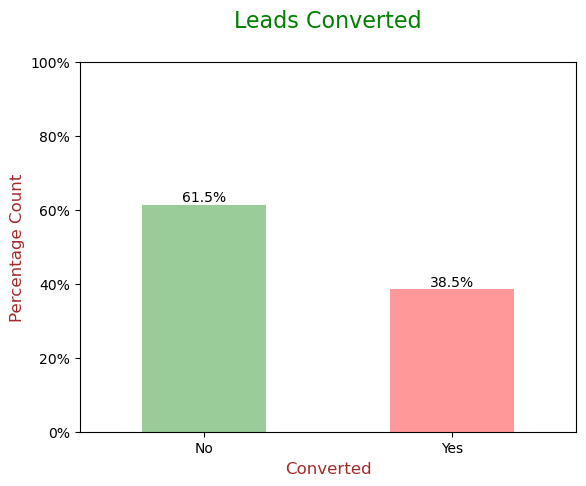

In [54]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


 ### <font color="black">KEY OBSERVATIONS</font>
- The conversion rate stands at 38.5%, indicating that only a minority, roughly 38.5% of individuals, have transformed into leads.
- Conversely, the majority, constituting about 61.5% of people, have not converted into leads.

In [55]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### 4.2 Univariate Analysis

In [56]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

                                  Tags  Free_copy  
0                           Other_Tags          0  
1                              Ringing          0  
2  Will revert after reading the email          1  
3                              Ringing          0  
4  Will revert after reading the email          0

#### 4.2.1 Univariate Analysis for Categorical Variables

In [57]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

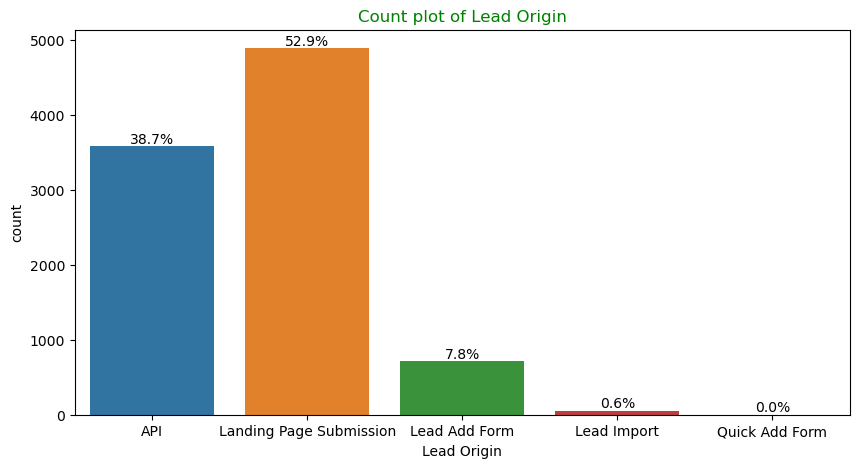

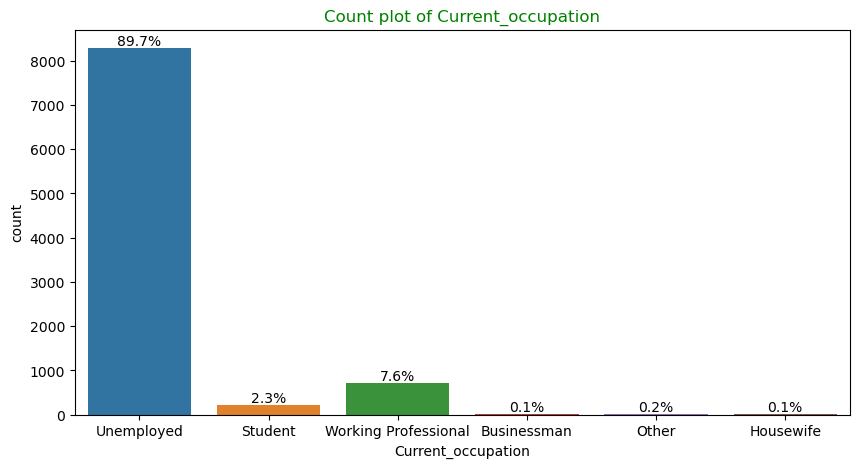

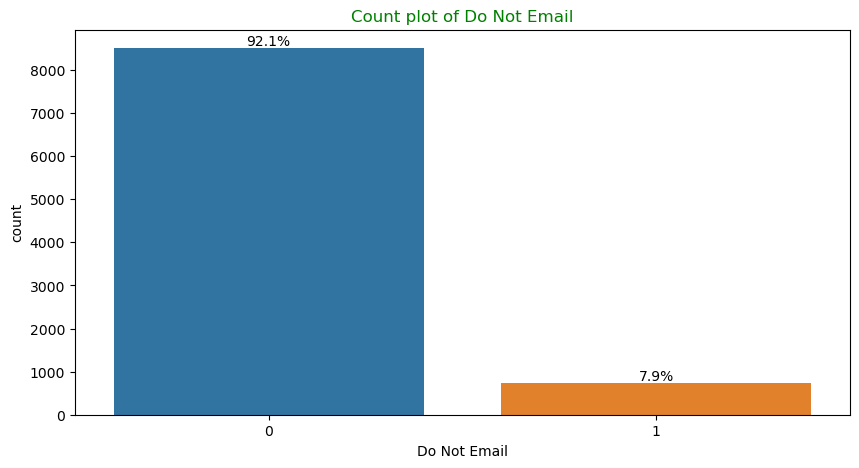

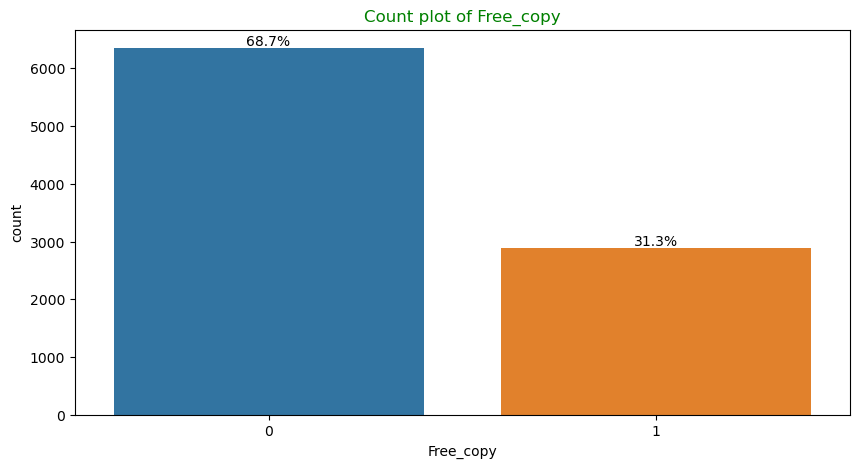

In [58]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

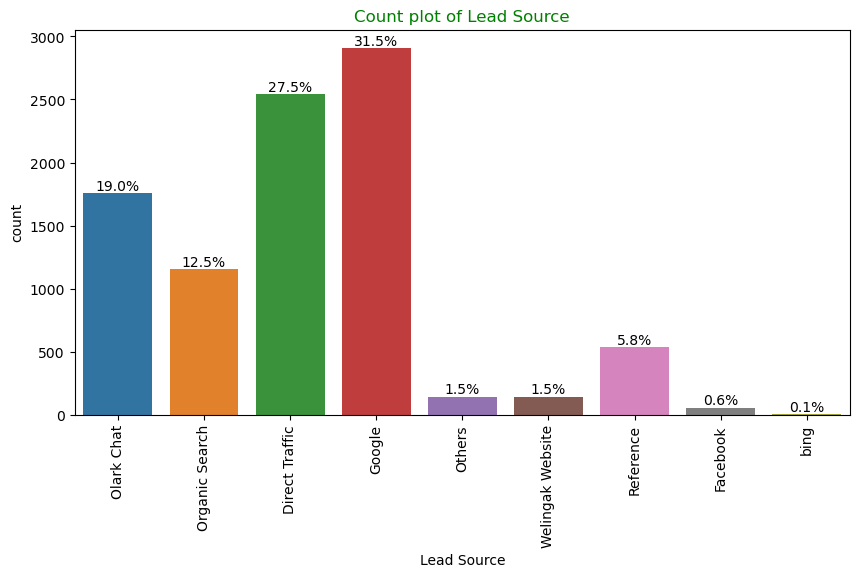

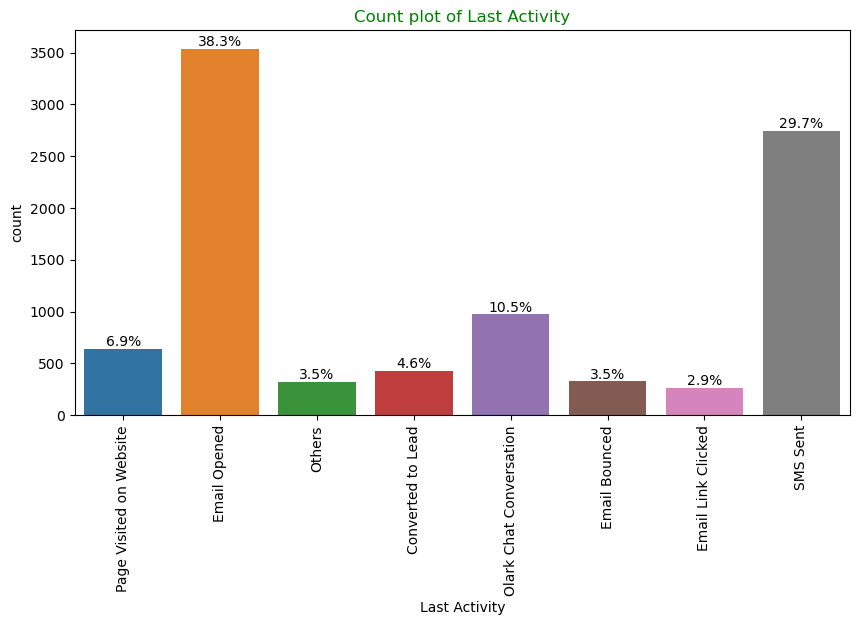

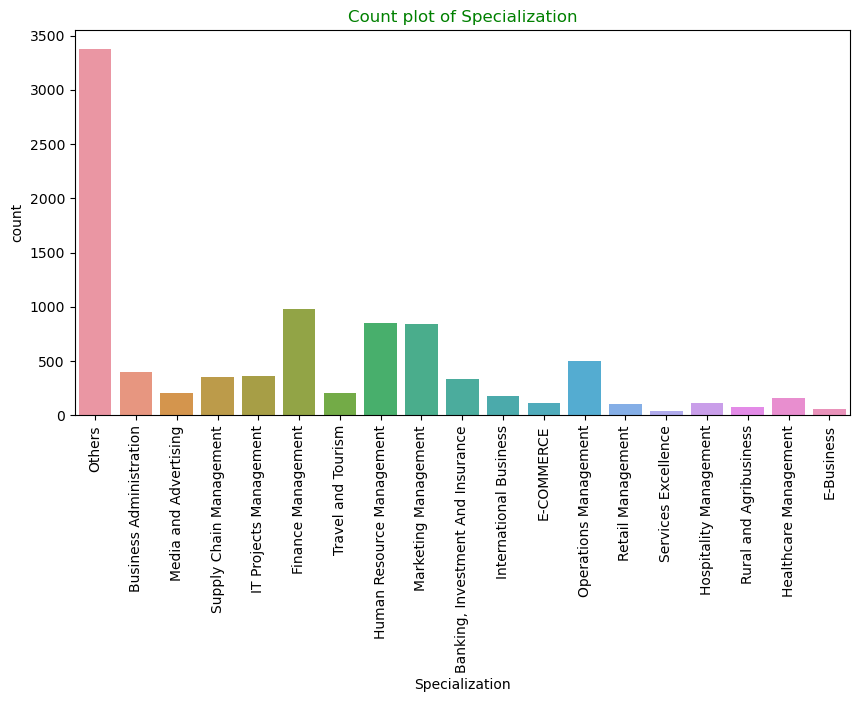

In [59]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

 #### <font color="black">KEY OBSERVATIONS</font>

In the Categorical Univariate Analysis, we gain insight into the percentage distribution of values within each variable. This helps us understand how values are distributed in each column.

**Insights from Univariate Analysis:**
Here is a list of features from variables that are present in the majority (including both Converted and Not Converted leads):

- **Lead Origin:** "Landing Page Submission" accounts for 53% of the customers, while "API" accounts for 39%.
- **Current Occupation:** About 90% of the customers are categorized as "Unemployed".
- **Do Not Email:** Approximately 92% of the people have indicated that they do not want to receive emails about the course.
- **Lead Source:** The combination of "Google" and "Direct Traffic" makes up 58% of the lead sources.
- **Last Activity:** Activities such as "SMS Sent" and "Email Opened" contribute to around 68% of customer interactions.

These insights will be valuable for the subsequent Bivariate Analysis.


### 4.3 Bivariate Analysis
- Bivariate analysis happens between two variables

#### 4.3.1 Bivariate Analysis for Categorical Variables

In [60]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


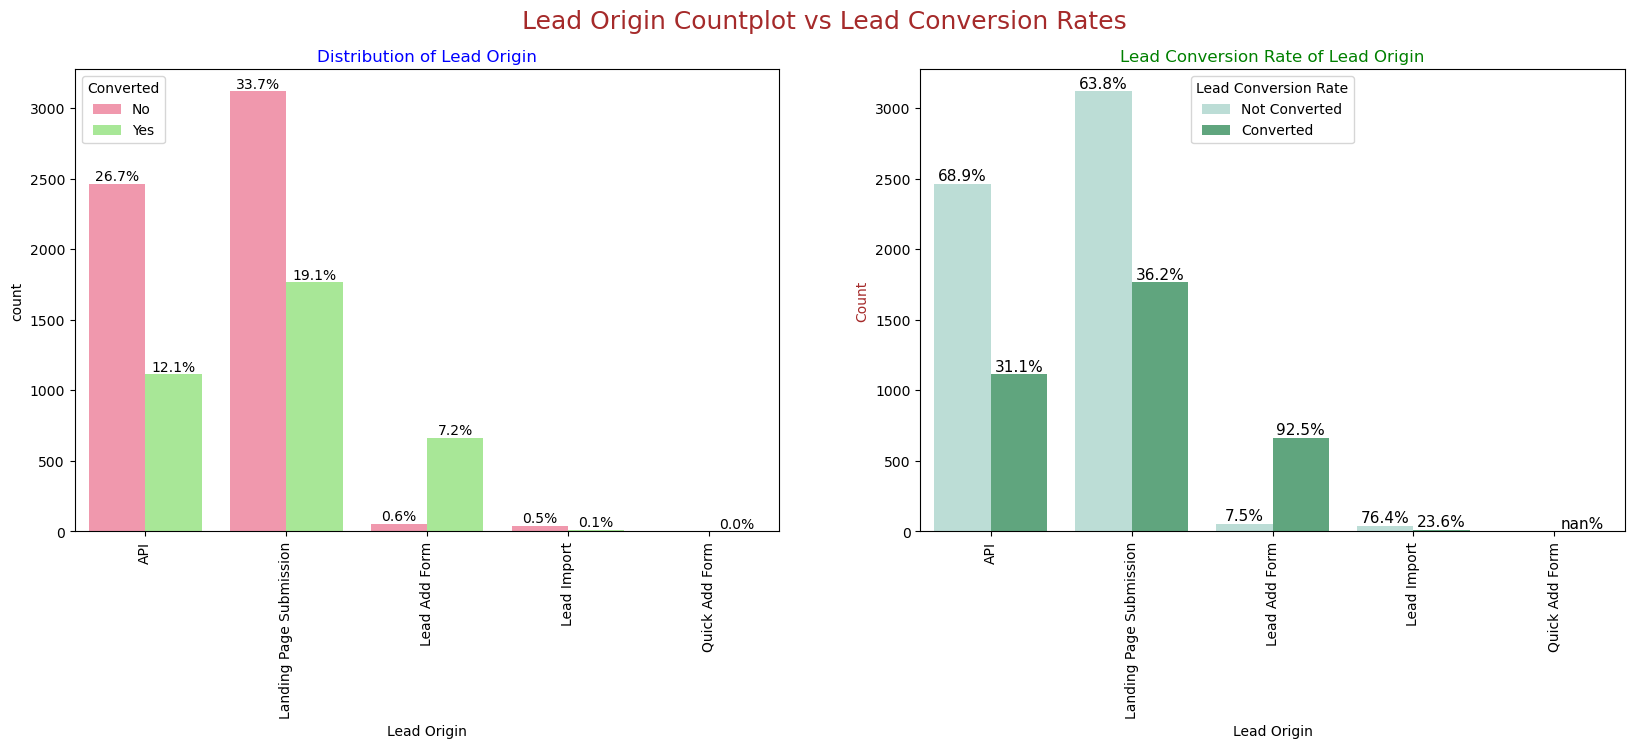

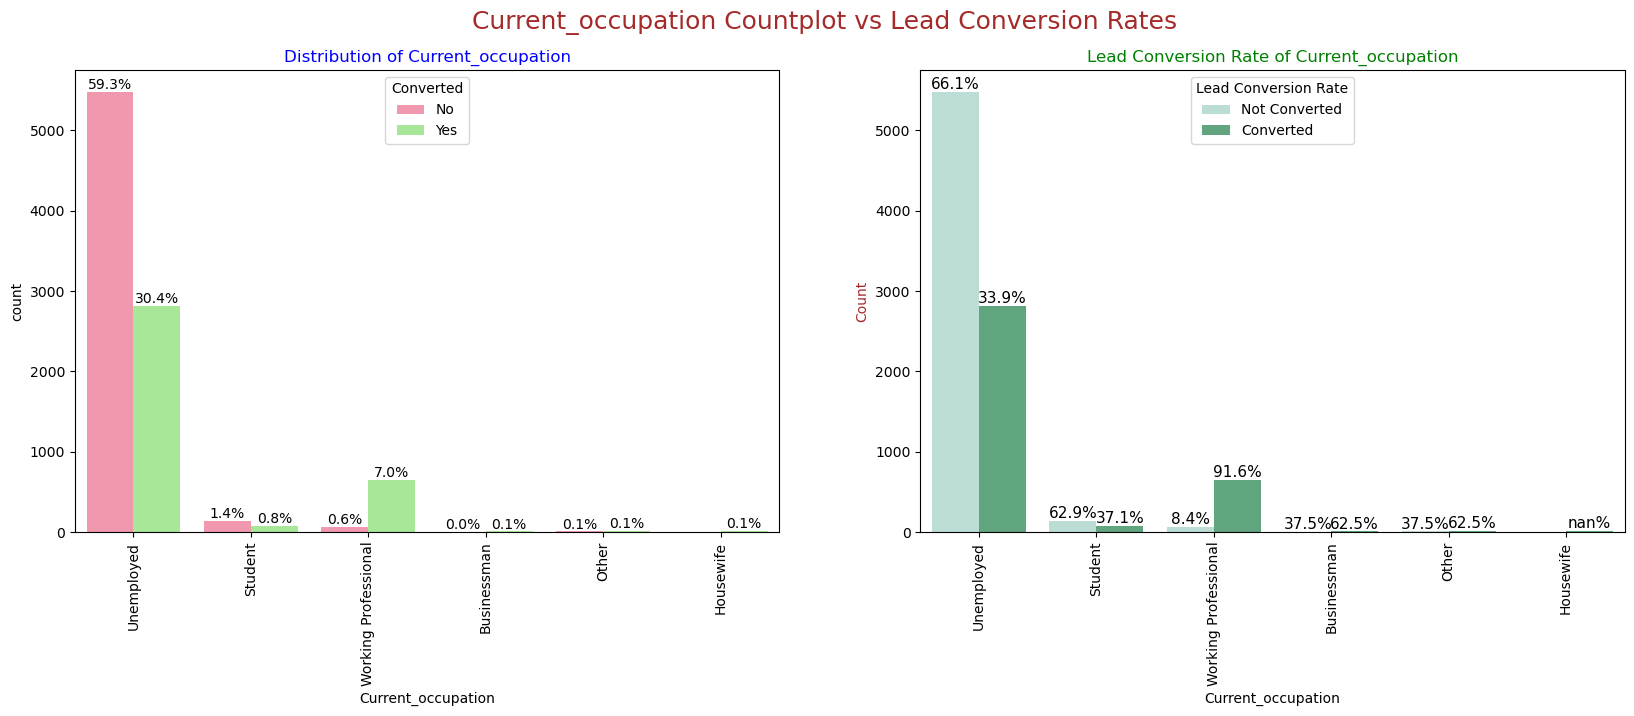

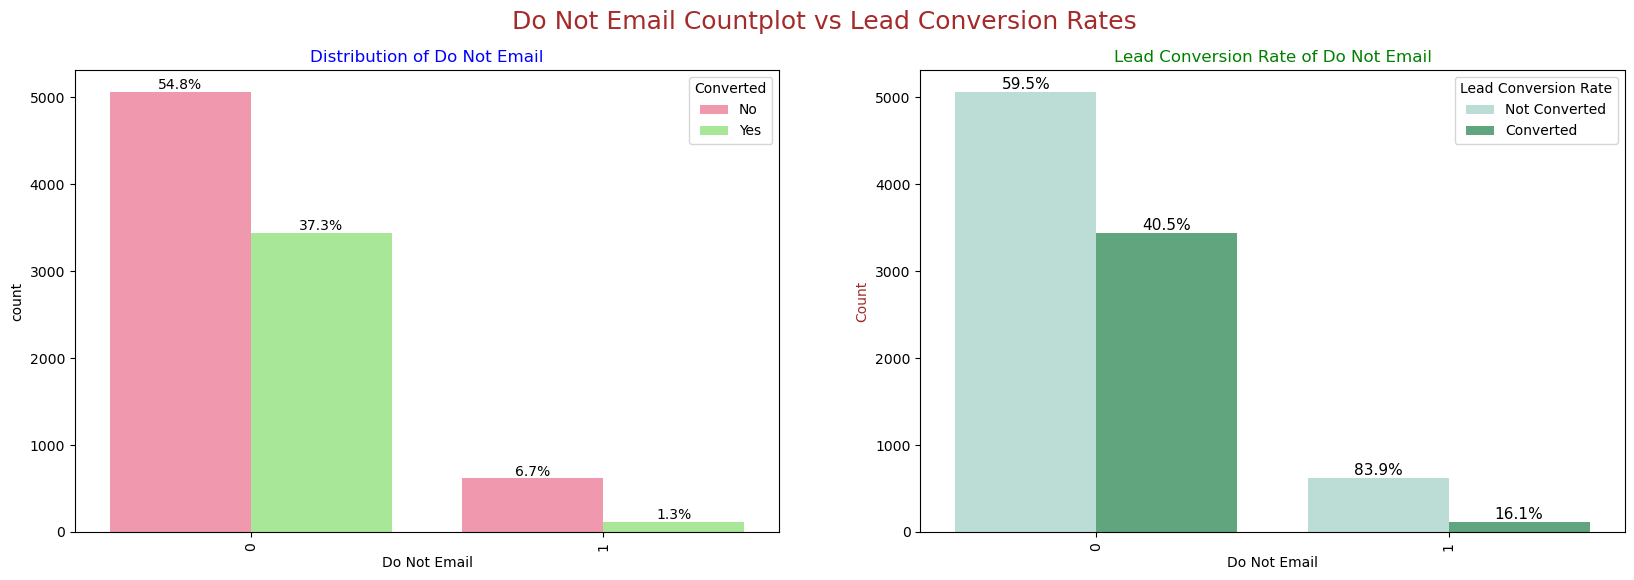

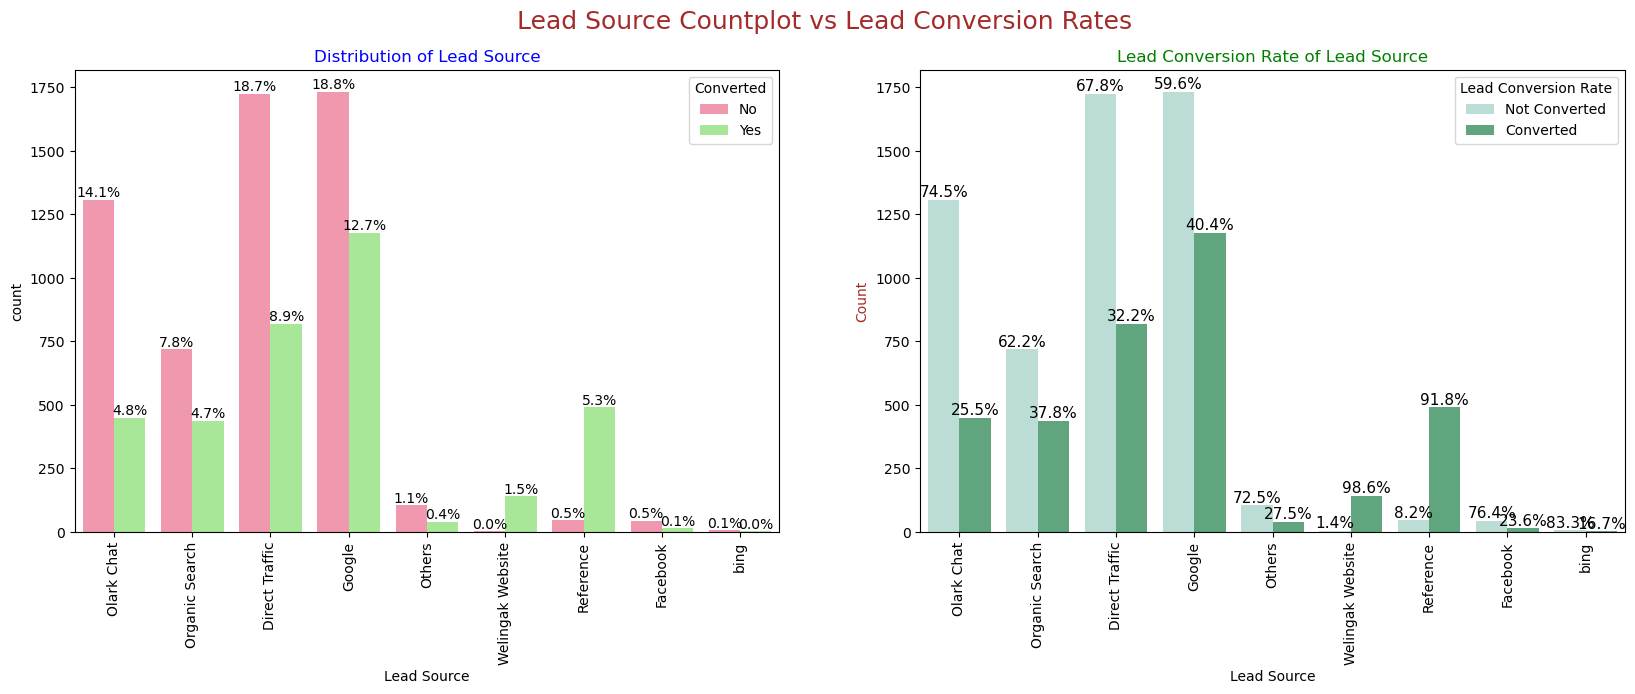

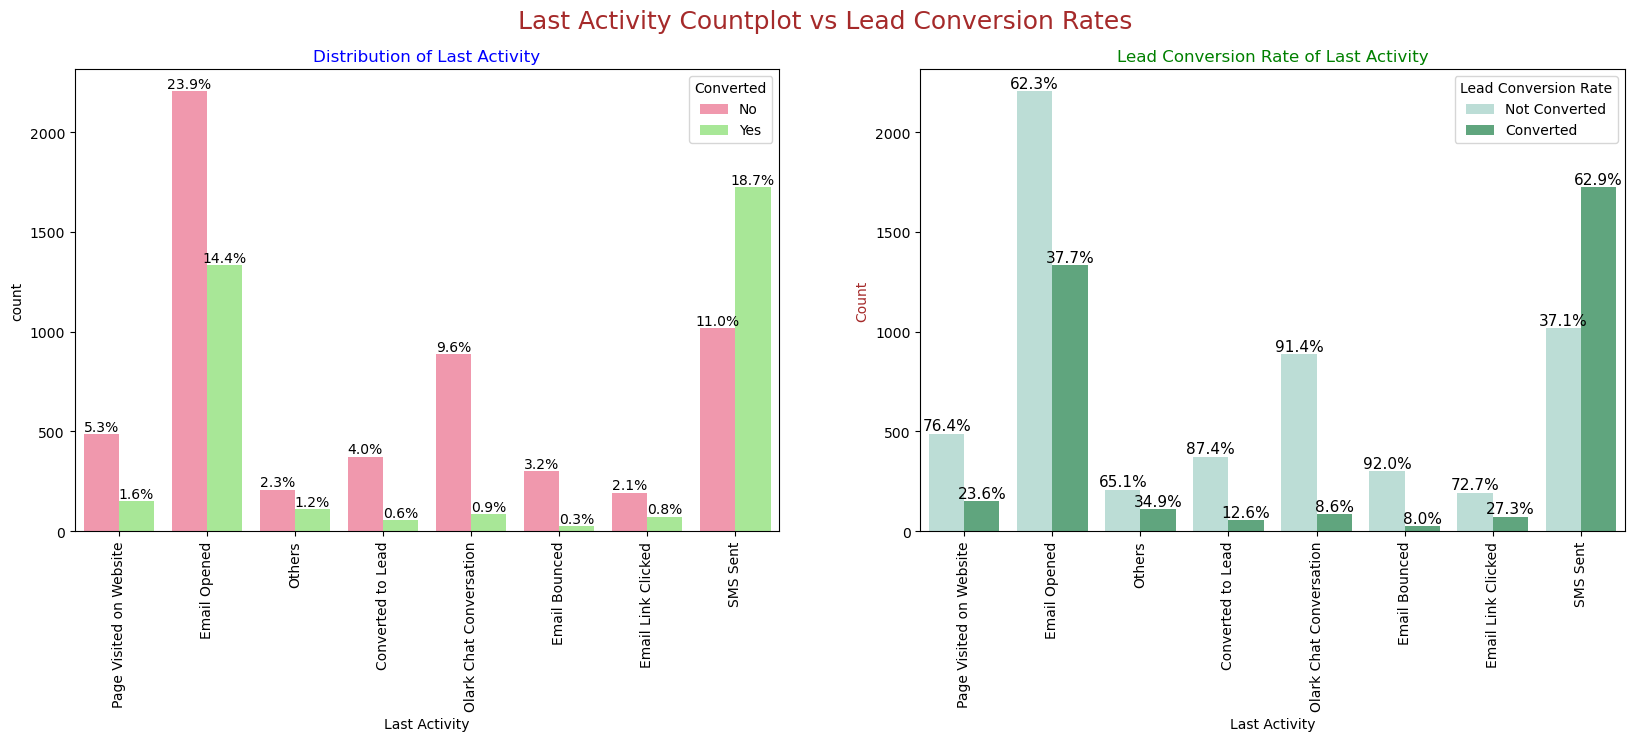

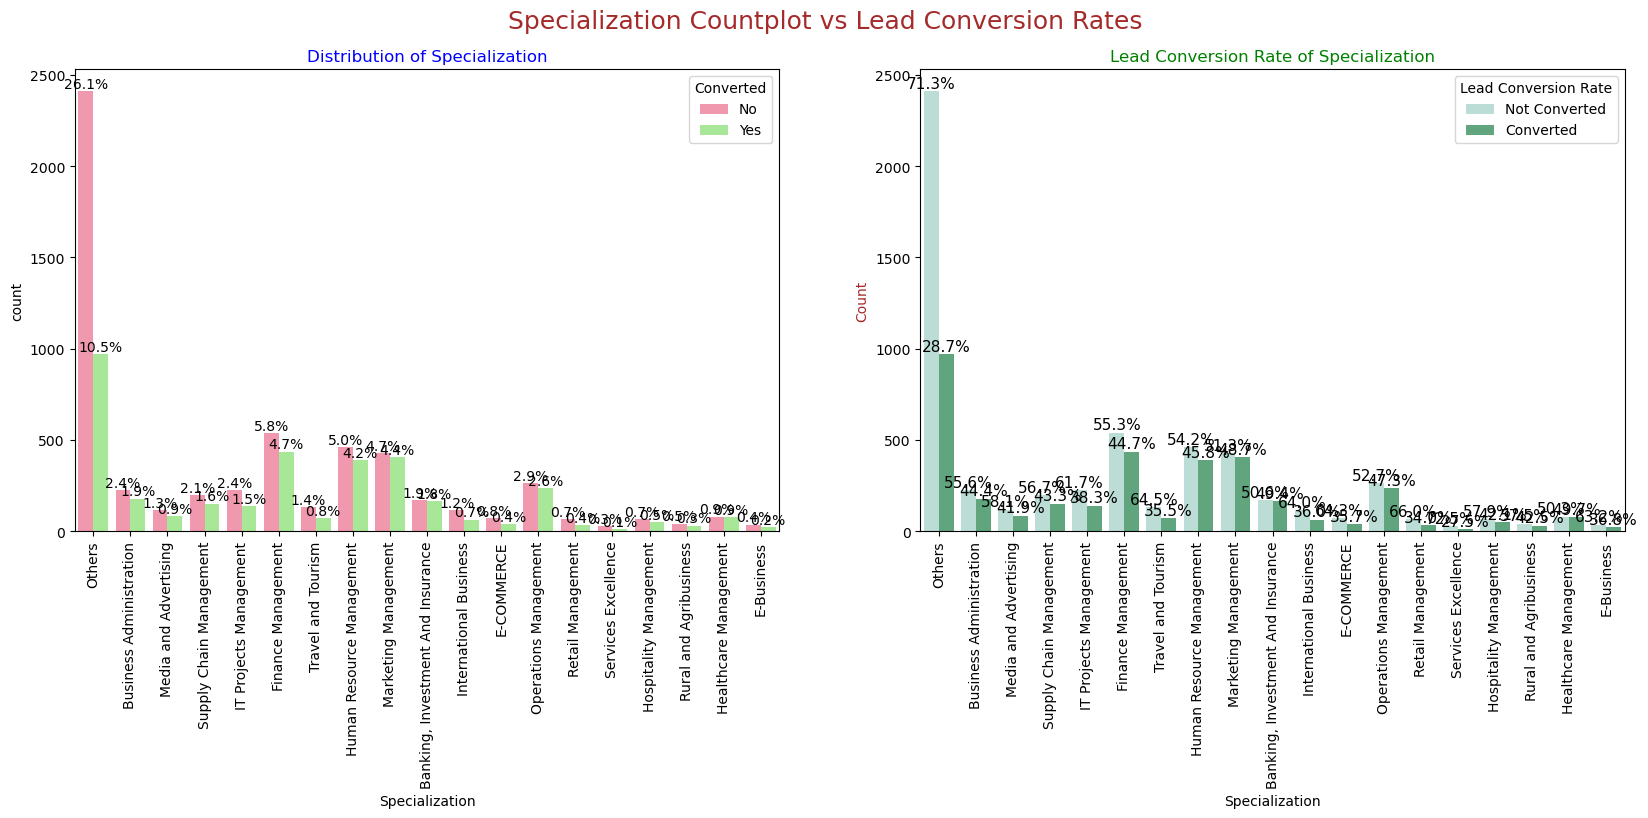

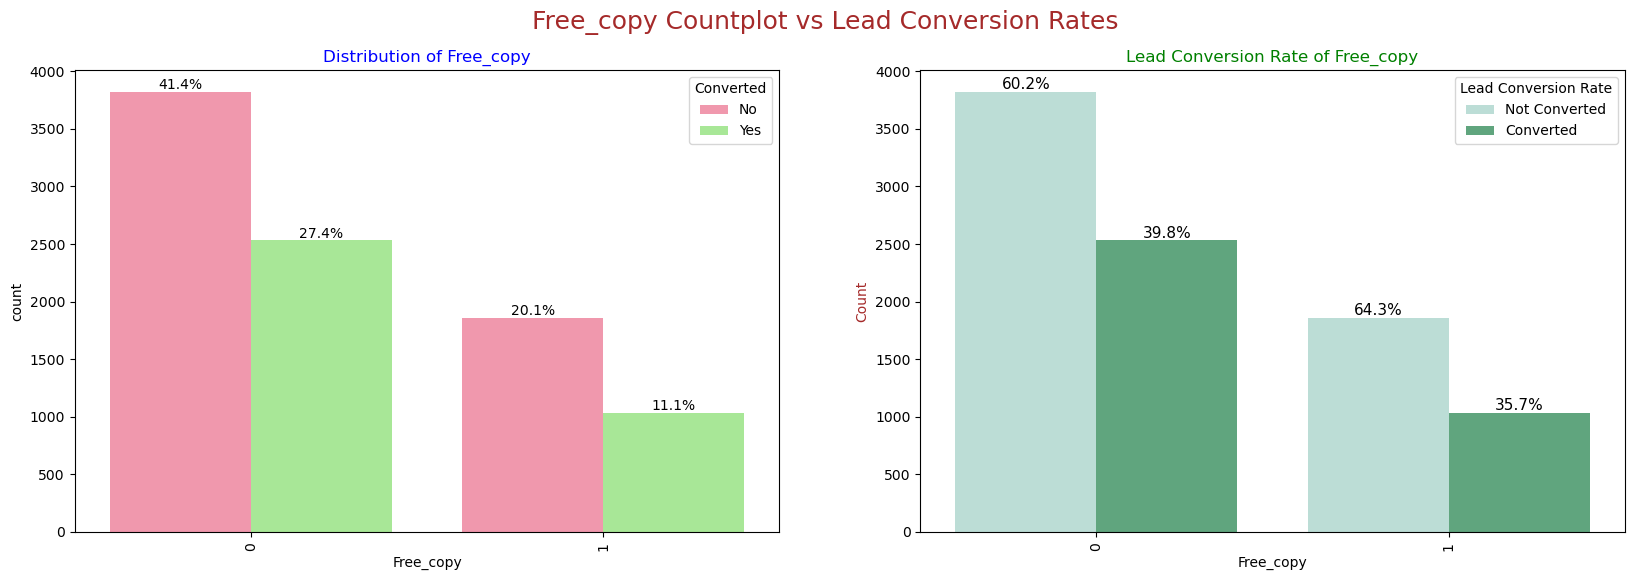

In [61]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)
    

 ### <font color="black">Key Observations:</font>

- **Lead Origin:** Around 52% of leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%. The "API" contributed to approximately 39% of customers, with a LCR of 31%.

- **Current Occupation:** About 90% of customers are unemployed with a lead conversion rate (LCR) of 34%. In contrast, Working Professionals constitute only 7.6% of total customers but exhibit an impressive LCR of almost 92%.

- **Do Not Email:** An overwhelming 92% of individuals have chosen not to receive email communication regarding the course.

- **Lead Source:** Google boasts a LCR of 40% from its 31% customer base. Direct Traffic follows with a 32% LCR and 27% customer contribution, slightly lower than Google. Organic Search yields a 37.8% LCR but from a customer base of only 12.5%. Remarkably, "Reference" stands out with a 91% LCR, though it accounts for merely 6% of customers.

- **Last Activity:** The "SMS Sent" activity exhibits a high lead conversion rate of 63%, contributing to 30% of last activities. "Email Opened" actions account for 38% of customer activities, yielding a 37% LCR.

- **Specialization:** Marketing Management, HR Management, and Finance Management display substantial contributions.


#### 4.3.2 Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

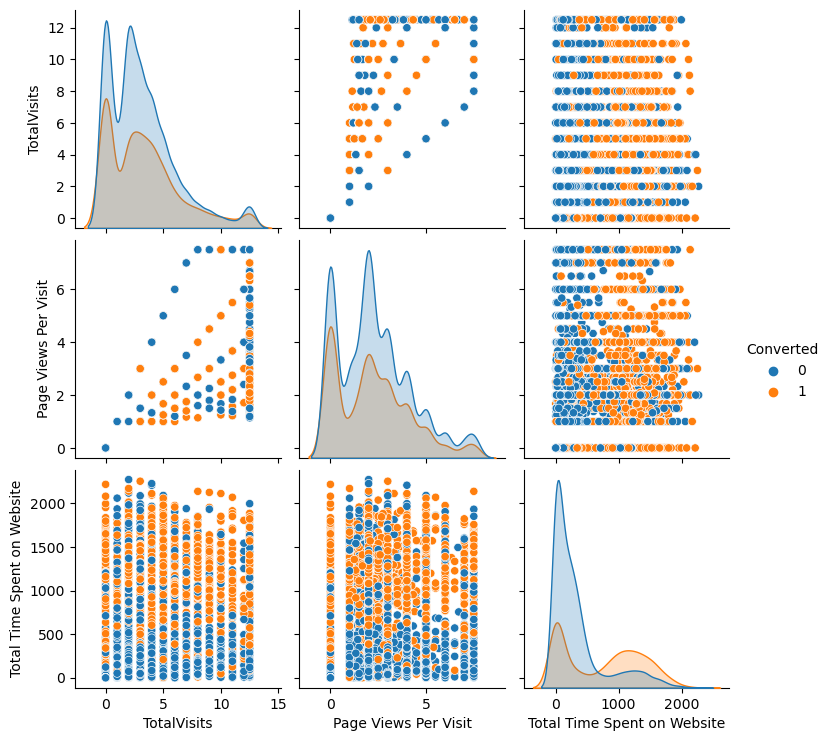

In [62]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [63]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

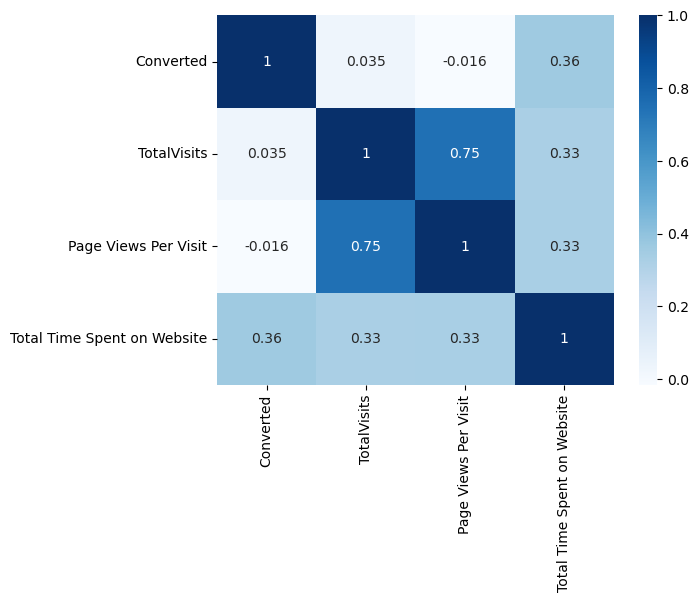

In [64]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

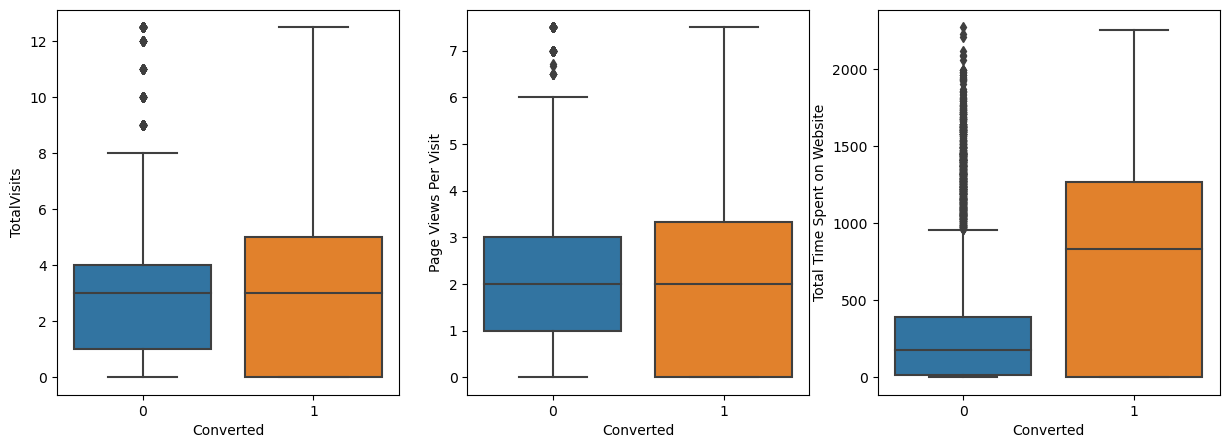

In [65]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

 #### <font color="black">KEY OBSERVATION</font>
- It's evident from the box plot that past leads who spend more time on the website tend to have a higher likelihood of successful conversion compared to those who spend less time.

## <strong><span style="color:green">Step 5: Data Preparation</span></strong>

### 5.1 Dummy Variables

- For categorical variables containing multiple levels, generate dummy features using one-hot encoding.

**Binary-level categorical columns have already been mapped to 1/0 in the preceding steps. Therefore, you can proceed with the creation of dummy variables.**

In [66]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

                                  Tags  Free_copy  
0                           Other_Tags          0  
1                              Ringing          0  
2  Will revert after reading the email          1  
3                              Ringing          0  
4  Will revert after reading the email          0

In [67]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation","Tags"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [68]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

                                  Tags  Free_copy  \
0                           Other_Tags          0   
1                              Ringing          0   
2  Will revert after reading the email          1   
3                              Ringing          0   
4  Will revert after reading the email          0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Welingak Website  \
0                   0                      0                             0   
1                   0                      0                             0   
2                   0                      0                             0   
3                   0                      0                             0   
4                   0                      0                             0   

   Lead Source_bing  Last Activity_Email Bounced  \
0                 0                            0   
1                 0                            0   
2                 0                            0   
3                 0                            0   
4                 0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   


In [69]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation","Tags"],1)

In [70]:
df_leads.shape

(9240, 51)

In [71]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## <strong><span style="color:green">Step 6: Test-Train Split </span></strong>

In [72]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]


In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 50) 
y_train: (6468,)


In [75]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 50) 
y_test: (2772,)


## <strong><span style="color:green">Step 7: Feature Scaling </span></strong>

In [76]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [77]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Welingak Website  Lead Source_bing  \
1871                      0                             0                 0   
6795                      0                             0                 0   
3516                      0                             0                 0   
8105                      0                             0                 0   
3934                      0                             0                 0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
1871                           1                                      0   
6795                           1                                      0   
3516                           1                                      0   
8105                           0                                      0   
3934                           1                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  \
1871                     0                                      0   
6795                     0                                      0   
3516                     0                                      0   
8105                     0                                      0   
3934                     0                                      0   

      Last Activity_SMS Sent  Specialization_Business Administration  \
1

In [78]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

<strong><span style="color:brown">IMPORTANT NOTE:</span></strong> The conversion rate is 38.5%.

### 7.1 : Looking at Correlations
- Eliminating Features Based on Correlations

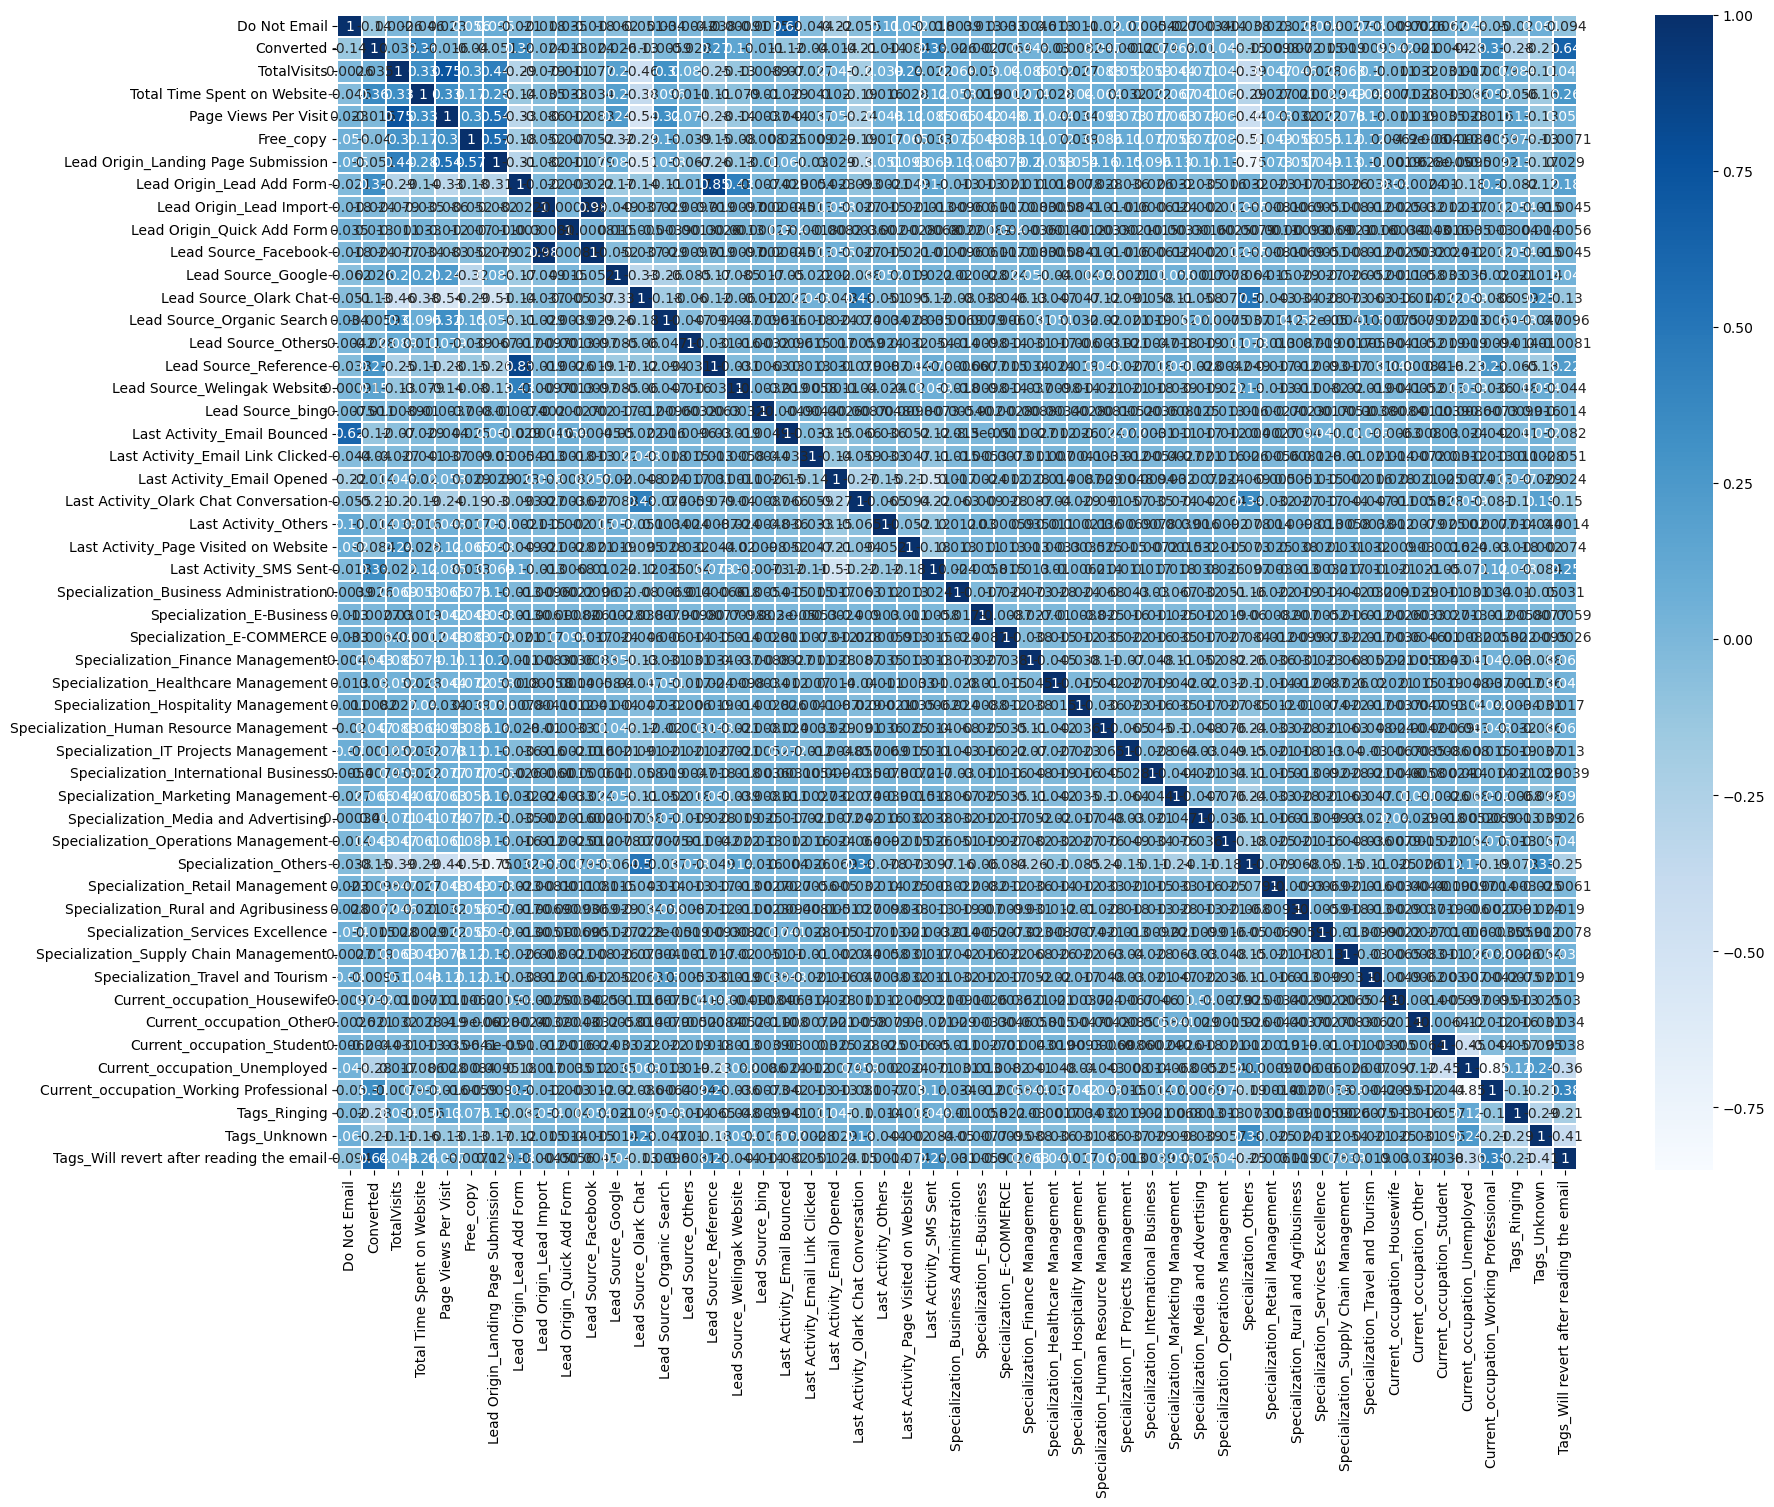

In [79]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

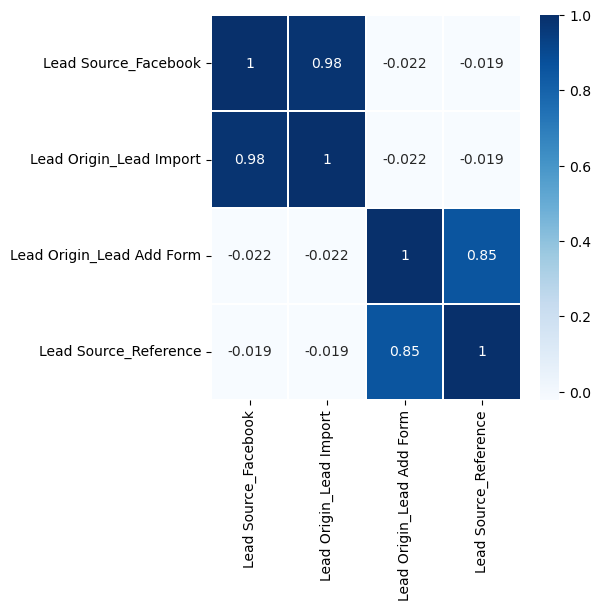

In [80]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

 ### <font color="black">KEY OBSERVATIONS</font>
- Predictor variables displayed high correlation, especially near the diagonal (0.98 and 0.85).
- To enhance model efficiency, it's recommended to remove one variable from each correlated pair.
- 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' will be dropped from the model.

In [81]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## <strong><span style="color:green">Step 8: Model Building </span></strong>

 ### <font color="black"> Model Construction: Logistic Regression</font>

We will construct a Logistic Regression Model to predict categorical variables. Our approach involves:

- **Feature Selection Using RFE (Recursive Feature Elimination):**
  Employing RFE for initial feature selection.

- **Manual Fine-Tuning:**
  Refining the model using manual adjustments based on p-values and VIFs (Variance Inflation Factors).


### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [82]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [83]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 15),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Free_copy', False, 28),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 7),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 2),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 24),
 ('Specializatio

In [84]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
47  Tags_Will revert after reading the email            True        1
30     Specialization_International Business            True        1
39         Specialization_Travel and Tourism            True        1
21                    Last Activity_SMS Sent            True        1
40              Current_occupation_Housewife            True        1
18     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
12                     Lead Source_Reference            True        1
42                Current_occupation_Student            True        1
13              Lead Source_Welingak Website            True        1
44   Current_occupation_Working Professional            True        1
2                Total Time Spent on Website            True        1
45                              Tags_Ringing            True        1
9                     Lead Source_Olark Chat            True        1
27     Specialization_Hospitality Management            True        1
19                      Last Activity_Others           False        2
41                  Current_occupation_Other           False        3
7                       Lead Source_Facebook           False        4
5        Lead Origin_Landing Page Submission           False        5
16          Last Activity_Email Link Clicked           False        6
14                          Lead Source_bing           False        7
1                                TotalVisits           False        8
3                       Page Views Per Visit           False        9
11                        Lead Source_Others           False       10
29     Specialization_IT Projects Management           False       11
25         Specialization_Finance Management           False       12
24                 Specialization_E-COMMERCE           False       13
6                 Lead Origin_Quick Add Form           False       14
0                               Do Not Email           False       15
20     Last Activity_Page Visited on Website           False       16
26      Specialization_Healthcare Management           False       17
32      Specialization_Media and Advertising           False       18
33      Specialization_Operations Management           False       19
36     Specialization_Rural and Agribusiness           False       20
10                Lead Source_Organic Search           False       21
15               Last Activity_Email Bounced           False       22
38    Specialization_Supply Chain Management           False       23
23                 Specialization_E-Business           False       24
43             Current_occupation_Unemployed           False       25
35          Specialization_Retail Management           False       26
34                     Specialization_Others           False       27
4                                  Free_copy           False       28
37        Specialization_Services Excellence           False       29
28  Specialization_Human Resource Management           False       30
22    Specialization_Business Administration           False       31
8                         Lead Source_Google           False       32
46                              Tags_Unknown           False       33
31       Specialization_Marketing Management           False       34

In [85]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Current_occupation_Housewife',
       'Current_occupation_Student', 'Current_occupation_Working Professional',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [86]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_bing',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specializa

In [87]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [88]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                       -2.480292
Total Time Spent on Website                  1.077868
Lead Source_Olark Chat                       1.239862
Lead Source_Reference                        3.810069
Lead Source_Welingak Website                 5.709334
Last Activity_Email Opened                   0.783860
Last Activity_Olark Chat Conversation       -0.770128
Last Activity_SMS Sent                       2.072777
Specialization_Hospitality Management       -1.076463
Specialization_International Business       -0.626141
Specialization_Travel and Tourism           -0.820891
Current_occupation_Housewife                21.767252
Current_occupation_Student                  -0.797222
Current_occupation_Working Professional      1.390782
Tags_Ringing                                -3.164942
Tags_Will revert after reading the email     4.231035
dtype: float64

In [89]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1829.2
Date:                Tue, 15 Aug 2023   Deviance:                       3658.3
Time:                        21:30:02   Pearson chi2:                 1.75e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5341
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

 #### <font color="brown">KEY OBSERVATIONS</font>
- The column "Current_occupation_Housewife" will be excluded from the model due to its high p-value of 0.999. This value surpasses the accepted significance threshold of 0.05 in statistical analysis.

### Model 2

In [90]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [91]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params.sort_values(ascending=False)

Lead Source_Welingak Website                5.704502
Tags_Will revert after reading the email    4.235340
Lead Source_Reference                       3.823673
Last Activity_SMS Sent                      2.072489
Current_occupation_Working Professional     1.382992
Lead Source_Olark Chat                      1.234756
Total Time Spent on Website                 1.078077
Last Activity_Email Opened                  0.792025
Specialization_International Business      -0.631354
Last Activity_Olark Chat Conversation      -0.768362
Current_occupation_Student                 -0.803841
Specialization_Travel and Tourism          -0.824611
Specialization_Hospitality Management      -1.083774
const                                      -2.478867
Tags_Ringing                               -3.169778
dtype: float64

In [92]:
# summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1832.5
Date:                Tue, 15 Aug 2023   Deviance:                       3665.1
Time:                        21:30:02   Pearson chi2:                 1.77e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5336
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [93]:
# checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

Features   VIF
0   Tags_Will revert after reading the email  1.81
1                     Lead Source_Olark Chat  1.75
2                     Last Activity_SMS Sent  1.57
3                 Last Activity_Email Opened  1.44
4      Last Activity_Olark Chat Conversation  1.41
5    Current_occupation_Working Professional  1.33
6                Total Time Spent on Website  1.31
7                      Lead Source_Reference  1.24
8                               Tags_Ringing  1.23
9               Lead Source_Welingak Website  1.05
10                Current_occupation_Student  1.03
11     Specialization_International Business  1.02
12         Specialization_Travel and Tourism  1.02
13     Specialization_Hospitality Management  1.01

- No variables require elimination as they all exhibit favorable VIF values below 5.

- Furthermore, the p-values for all variables are below 0.05, signifying strong statistical significance. The model appears to be well-managed in terms of both p-values and VIFs.

- Consequently, we are ready to proceed with Model 2 for the subsequent phase of Model Evaluation.

## <strong><span style="color:green">Step 9: Model Evaluation </span></strong> 

**During the Model Evaluation phase, we will assess the performance using the following metrics:**

- Confusion Matrix: Constructing a matrix to visualize true positive, true negative, false positive, and false negative outcomes.

- Accuracy: Calculating the ratio of correctly predicted instances to the total instances.

- Sensitivity and Specificity: Determining the model's ability to correctly identify positive cases and negative cases, respectively.

- Threshold Determination using ROC & Finding Optimal Cutoff Point: Utilizing the Receiver Operating Characteristic curve to identify an optimal threshold for classification.

- Precision and Recall: Evaluating the precision (ability to correctly predict positive instances) and recall (ability to identify all positive instances).

In [94]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm2)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.010187
6795    0.157006
3516    0.012527
8105    0.108675
3934    0.196774
4844    0.999269
3297    0.003528
8071    0.920266
987     0.138753
7423    0.997421
dtype: float64

In [95]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01018743, 0.15700564, 0.01252698, 0.10867533, 0.19677356,
       0.99926896, 0.00352816, 0.92026556, 0.13875277, 0.9974207 ])

In [96]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.010187         1871
1          0        0.157006         6795
2          0        0.012527         3516
3          0        0.108675         8105
4          0        0.196774         3934

#### <font color="brown">IMPORTANT NOTE</font>
- The next step involves determining the optimal cutoff threshold value for probabilities. To begin, we will use the default value of 0.5. A new feature called "predicted" will be added to the existing dataframe, based on the calculated probabilities.

In [97]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.010187         1871          0
1          0        0.157006         6795          0
2          0        0.012527         3516          0
3          0        0.108675         8105          0
4          0        0.196774         3934          0

### 9.1 Confusion Matrix

In [98]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3784  218]
 [ 543 1923]]


In [99]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 9.2 Accuracy

In [100]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8823438466295609


### 9.3 Metrics beyond simply accuracy

#### Sensitivity and Specificity

When making predictions using a probability threshold of 0.5:

- **Sensitivity:** This indicates how well the model correctly identifies positive cases. It measures the proportion of actual positive cases that are correctly predicted as positive by the model.

- **Specificity:** This gauges the model's ability to accurately identify negative cases. It quantifies the proportion of actual negative cases that are correctly predicted as negative by the model.


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7798053527980535


In [103]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.9455272363818091


In [104]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.0544727636181909


In [105]:
# positive predictive value 
print (TP / float(TP+FP))

0.8981784212984587


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8745088976195978


### 9.4 Plotting the ROC Curve

An ROC curve illustrates the following insights:

**Tradeoff between Sensitivity and Specificity:** The curve visualizes the compromise between correctly identifying positive cases (sensitivity) and accurately identifying negative cases (specificity). Enhancing sensitivity could lead to a decrease in specificity, and vice versa.

**Curve Position:** The positioning of the curve matters. If it closely traces the left and upper borders of the ROC space, the test is more accurate. Conversely, if it approaches the 45-degree diagonal line, the test's accuracy diminishes.

In [107]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

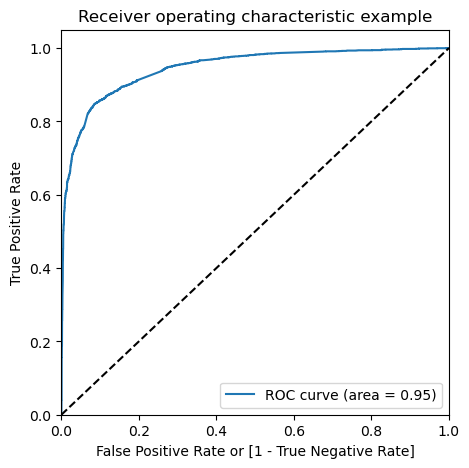

In [109]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:BROWN">IMPORTANT NOTE:</span></strong>

The Area Under the ROC Curve (AUC-ROC) is calculated as 0.95 out of a maximum of 1. This score signifies that the predictive model is performing well. A higher AUC-ROC value indicates a stronger ability of the model to distinguish between positive and negative cases.

### 9.4.1 Finding Optimal Cutoff Point/ Probability
- It refers to the probability threshold at which we achieve a balanced level of sensitivity and specificity.

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.010187         1871          0    1    0    0    0    0   
1          0        0.157006         6795          0    1    1    0    0    0   
2          0        0.012527         3516          0    1    0    0    0    0   
3          0        0.108675         8105          0    1    1    0    0    0   
4          0        0.196774         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.761132  0.966748  0.634433
0.2   0.2  0.845083  0.911598  0.804098
0.3   0.3  0.876469  0.873074  0.878561
0.4   0.4  0.888837  0.839822  0.919040
0.5   0.5  0.882344  0.779805  0.945527
0.6   0.6  0.876469  0.740065  0.960520
0.7   0.7  0.869975  0.703163  0.972764
0.8   0.8  0.853432  0.645985  0.981259
0.9   0.9  0.838745  0.593268  0.990005


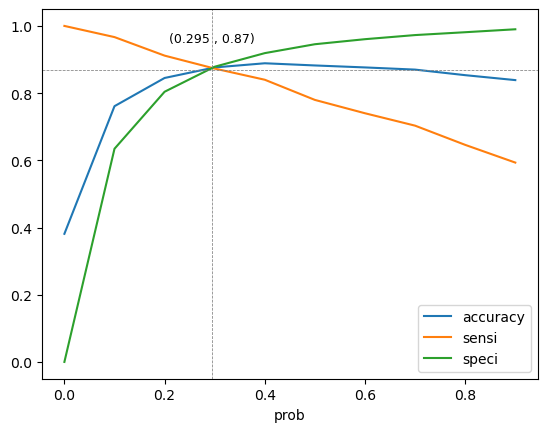

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:BROWN">IMPORTANT NOTE:</span></strong> 
- The approximate point where all the curves intersect is around 0.295. Therefore, it appears that our optimal cutoff point for the probability threshold is 0.295.

- Let's proceed to remap the values using this optimal cutoff point.

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.295 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.010187         1871                0
1          0        0.157006         6795                0
2          0        0.012527         3516                0
3          0        0.108675         8105                0
4          0        0.196774         3934                0

### 9.5 Calculating all metrics using confusion matrix for Train

In [114]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8747680890538033


In [115]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [116]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("-"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("-"*50,"\n")

-------------------------------------------------- 

Confusion Matrix
[[3504  498]
 [ 312 2154]] 

-------------------------------------------------- 

True Negative                    :  3504
True Positive                    :  2154
False Negative                   :  312
False Positve                    :  498
Model Accuracy                   :  0.8748
Model Sensitivity                :  0.8735
Model Specificity                :  0.8756
Model Precision                  :  0.8122
Model Recall                     :  0.8735
Model True Positive Rate (TPR)   :  0.8735
Model False Positive Rate (FPR)  :  0.1244


-------------------------------------------------- 



### 9.6 Precision and recall tradeoff
- We will compare all the metrics from both the Precision-Recall view and the Sensitivity-Specificity view. The objective is to identify a probability threshold that can enhance the conversion rate beyond 80%, in line with the CEO's request.

In [117]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

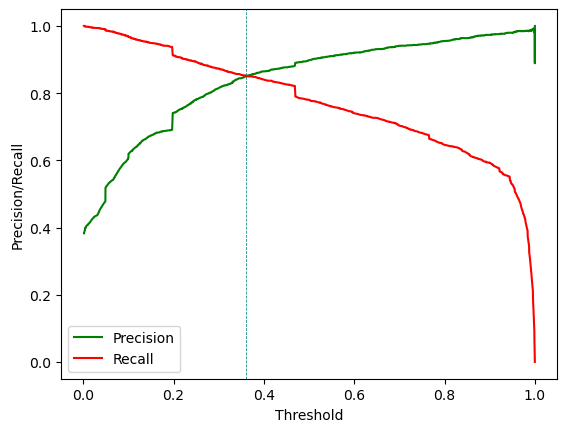

In [118]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.36, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:BROWN">IMPORTANT NOTE:</span></strong> 
- The intersection point of the curve signifies the threshold value where the model achieves equilibrium between precision and recall.
- This point can be utilized to fine-tune the model's performance according to business needs.
- In this case, the probability threshold is approximately 0.36, as deduced from the curve.

In [119]:
# copying df to test model evaluation with precision recall threshold of 0.36
y_train_precision_recall = y_train_pred_final.copy()

In [120]:
# assigning a feature for 0.36
# cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.010187         1871                0   
1          0        0.157006         6795                0   
2          0        0.012527         3516                0   
3          0        0.108675         8105                0   
4          0        0.196774         3934                0   

   precision_recall_prediction  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [121]:
## Lets see all matrics at 0.36 cutoff in precision-recall view and compare it with 0.295 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("-"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("-"*50,"\n")


-------------------------------------------------- 

Confusion Matrix
[[3631  371]
 [ 363 2103]] 

-------------------------------------------------- 

True Negative                    :  3631
True Positive                    :  2103
False Negative                   :  363
False Positve                    :  371
Model Accuracy                   :  0.8865
Model Sensitivity                :  0.8528
Model Specificity                :  0.9073
Model Precision                  :  0.85
Model Recall                     :  0.8528
Model True Positive Rate (TPR)   :  0.8528
Model False Positive Rate (FPR)  :  0.0927


-------------------------------------------------- 



<strong><span style="color:BROWN">IMPORTANT NOTE:</span></strong> 
- Upon observation of the metrics, it's apparent that using a precision-recall threshold cutoff of 0.36 results in values of around 85% for True Positive Rate, Sensitivity, and Recall.

- Despite obtaining favorable metric scores from both precision-recall and sensitivity-specificity curves, we will proceed with the sensitivity-specificity view to determine our optimal cutoff for final predictions.


### <strong><span style="color:BROWN"> Incorporating the "Lead Score" Feature into the Training Dataframe </span></strong> 


Introducing the "Lead Score" feature to the training dataframe. A higher score signifies a greater likelihood of lead conversion, categorizing the lead as "hot." Conversely, a lower score indicates a colder lead with lower chances of conversion.

In [122]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.010187         1871                0           1
1          0        0.157006         6795                0          16
2          0        0.012527         3516                0           1
3          0        0.108675         8105                0          11
4          0        0.196774         3934                0          20

## <font color="green">Step 10: Making Predictions on test set </font>

### 10.1 Scaling Test dataset

In [123]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [124]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Source_Olark Chat  \
4269                     0.964504                       0   
2376                    -0.885371                       0   
7766                    -0.777416                       0   
9199                    -0.885371                       1   
4359                    -0.885371                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
4269                      0                             0   
2376                      1                             0   
7766                      0                             0   
9199                      0                             0   
4359                      1                             0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
4269                           0                                      0   
2376                           0                                      0   
7766                           0                                      0   
9199                           0                                      1   
4359                           1                                      0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_International Business  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      0   
4359                                      0   

      Specialization_Travel and Tourism  Current_occupation_Student  \
4269                                  0                           0   
2376                                  0                           0   
7766                                  0                           0   
9199                                  0                           0   
4359                                  0                           0   

      Current_occupation_Working Professional  Tags_Ringing  \
4269                                        0             0   
2376                                        0             0   
7766                                        1             0   
9199                                        0             0   
4359                                        0             0   

      Tags_Will revert after reading the email  
4269                                         0  
2376                                         1  
7766                                         1  
9199                                         0  
4359                                         1

### 10.2 Prediction on Test Dataset using final model 

In [125]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [126]:
# making prediction using model 4 (final model)
y_test_pred = logm2.predict(X_test_sm)

In [127]:
# top 10 columns
y_test_pred[:10]

4269    0.653267
2376    0.998768
7766    0.908989
9199    0.048941
4359    0.995582
9186    0.983401
1631    0.973202
8963    0.893086
8007    0.059817
5324    0.960459
dtype: float64

In [128]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.653267
2376  0.998768
7766  0.908989
9199  0.048941
4359  0.995582

In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [130]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.653267
1          1         2376  0.998768
2          1         7766  0.908989
3          0         9199  0.048941
4          1         4359  0.995582

In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.653267
1         2376          1        0.998768
2         7766          1        0.908989
3         9199          0        0.048941
4         4359          1        0.995582

In [132]:
# taking sensitivity-specificity method at 0. probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.295 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.653267                1
1         2376          1        0.998768                1
2         7766          1        0.908989                1
3         9199          0        0.048941                0
4         4359          1        0.995582                1

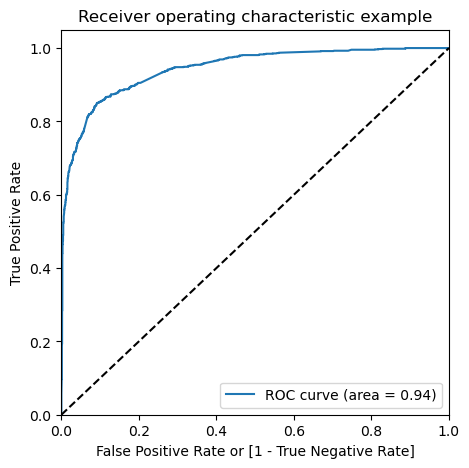

In [133]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:BROWN">IMPORTANT NOTE:</span></strong> The Area Under the ROC Curve (AUC-ROC) is calculated as 0.94 out of a maximum of 1. This score indicates that the predictive model is performing well. A higher AUC-ROC value signifies a strong ability of the model to distinguish between positive and negative cases.

- With the final predictions in place, the subsequent task involves assessing the predictive model's performance on a test dataset.
- This entails comparing the predicted labels (final_predicted) against the actual labels (Converted) to compute a range of performance metrics, including accuracy, precision, recall, and more.

### 10.3 Test set Model Evaluation
- We will compute various metrics using the confusion matrix for the test set.

In [134]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("-"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("-"*50,"\n")

-------------------------------------------------- 

Confusion Matrix
[[1471  206]
 [ 145  950]] 

-------------------------------------------------- 

True Negative                    :  1471
True Positive                    :  950
False Negative                   :  145
False Positve                    :  206
Model Accuracy                   :  0.8734
Model Sensitivity                :  0.8676
Model Specificity                :  0.8772
Model Precision                  :  0.8218
Model Recall                     :  0.8676
Model True Positive Rate (TPR)   :  0.8676
Model False Positive Rate (FPR)  :  0.1228


-------------------------------------------------- 



<strong><span style="color:BROWN">KEY OBSERVATION</span></strong> The evaluation metrics demonstrate a remarkable similarity across various criteria for both the test and training datasets. This consistency signifies that the model performs consistently across different evaluation metrics for both sets.

**For the test set:**

- Accuracy: 87.34%
- Sensitivity: 86.76%
- Specificity: 87.72%

These metrics closely align with those of the training set, confirming that our final model "logm2" exhibits robust performance consistency across both the training and test datasets.

In [135]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                5.704502
Tags_Will revert after reading the email    4.235340
Lead Source_Reference                       3.823673
Last Activity_SMS Sent                      2.072489
Current_occupation_Working Professional     1.382992
Lead Source_Olark Chat                      1.234756
Total Time Spent on Website                 1.078077
Last Activity_Email Opened                  0.792025
Specialization_International Business      -0.631354
Last Activity_Olark Chat Conversation      -0.768362
Current_occupation_Student                 -0.803841
Specialization_Travel and Tourism          -0.824611
Specialization_Hospitality Management      -1.083774
const                                      -2.478867
Tags_Ringing                               -3.169778
dtype: float64

<strong><span style="color:BROWN">IMPORTANT NOTE:</span></strong> A significant positive coefficient signifies that a variable holds substantial influence in predicting the probability of leads converting to enroll in X-Education's course.

## <strong><span style="color:BROWN"> Incorporating the "Lead Score" Feature into the Test Dataframe </span></strong> 
Introducing the "Lead Score" feature to the test dataframe. A higher score indicates a greater likelihood of lead conversion, categorizing the lead as "hot." Conversely, a lower score suggests a colder lead with lower chances of conversion.

In [136]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.653267                1          65
1         2376          1        0.998768                1         100
2         7766          1        0.908989                1          91
3         9199          0        0.048941                0           5
4         4359          1        0.995582                1         100

<strong><span style="color:purple">Lead Score: Assigning Significance</span></strong> 
- Lead Score is attributed to customers, serving as an indicator of their likelihood to convert. 
- Customers with higher lead scores hold a greater potential for conversion, while those with lower lead scores exhibit reduced chances of conversion.

<hr/>

## Model Performance: Train and Test Evaluation Metrics

### Train Data Set:
- Accuracy: 87.48%
- Sensitivity: 87.35%
- Specificity: 87.56%

### Test Data Set:
- Accuracy : 87.34%
- Sensitivity : 86.76%
- Specificity : 87.72%

### Consistent Performance Across Metrics:
The evaluation metrics show a remarkable consistency across both the train and test datasets. This suggests that the model is performing consistently well across various evaluation criteria.

### Sensitivity Analysis:
The model achieved a sensitivity of 87.35% in the train set and 86.76% in the test set, using a cut-off value of 0.295. Sensitivity in this context indicates the model's ability to correctly identify converting leads out of all potential leads. This aligns with the CEO's target sensitivity of approximately 80%.

### Objective Achievement:
Furthermore, the model's accuracy of 80.46% in the train dataset aligns well with the study's objectives and demonstrates the effectiveness of the approach.


## Model Parameters:

The final Logistic Regression Model encompasses 12 features.

## Top 3 Positive Contributors to Predicting Hot Leads:

1. Lead Source: Olark Chat
2. Lead Source: Reference
3. Current Occupation: Working Professional

## Optimal Cutoff Probability Point:

- The optimal probability cutoff point is determined as 0.295.
- Leads with a converted probability greater than 0.295 will be predicted as Hot Leads (Converted Leads).
- Leads with a converted probability smaller than 0.295 will be predicted as Cold Leads (Not Converted Leads).


## Recommendations for Increasing Lead Conversion Rates:

1. **Leverage Positive Coefficients:** Focus on features with positive coefficients for targeted marketing strategies to attract leads more likely to convert.

2. **Target High-Performing Sources:** Develop strategies to attract high-quality leads from top-performing lead sources to enhance conversion rates.

3. **Tailored Engagement for Professionals:** Engage working professionals with personalized messaging that aligns with their needs and preferences.

4. **Optimize Communication Channels:** Optimize communication channels based on their impact on lead engagement to improve conversion rates.

5. **Allocate Budget to Website Advertising:** Invest more budget in advertising and promotion on the Welingak website to expand reach and visibility.

6. **Encourage Referrals with Incentives:** Introduce incentives or discounts for individuals who provide references that eventually convert into leads, promoting more referrals.

7. **Aggressive Targeting of Working Professionals:** Aggressively target working professionals due to their high conversion rate and potential financial capacity to afford higher fees.

## Recommendations for Identifying Areas of Improvement:

1. **Analyze Negative Coefficients:** Examine features with negative coefficients in specialization offerings to identify aspects that may be hindering lead conversion.

2. **Review Landing Page Submission:** Evaluate the landing page submission process to identify and address areas that might be causing friction and deterring conversions.
